<a href="https://colab.research.google.com/github/CelinaLIN/Loan-Default-Prediction/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import math
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


In [ ]:
#read data
DATAFILE = '/content/drive/MyDrive/Colab Notebooks/loan_data_training.csv'
loan_applicants_data = pd.read_csv(DATAFILE)
loan_applicants_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100031       1         Cash loans           F            N   
2      100047       1         Cash loans           M            N   
3      100049       1         Cash loans           F            N   
4      100112       1         Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               Y             0          112500.0    979992.0      27076.5   
2               Y             0          202500.0   1193580.0      35028.0   
3               N             0          135000.0    288873.0      16258.5   
4               Y             0          315000.0    953460.0      64107.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied               Working   
1         702000.0   Unaccompanied               Working   
2         855000.0   Unaccompanied  Commercial associate   
3         238500.0   Unaccompanied               Working   
4         900000.0          Family  Commercial associate   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Secondary / secondary special                 Widow  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4              Incomplete higher  Single / not married       With parents   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.018029      -18724          -2628            -6573.0   
2                    0.025164      -17482          -1262            -1182.0   
3                    0.007305      -13384          -3597              -45.0   
4                    0.030755      -10199          -2015            -4802.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1            -1827           1               1                0   
2            -1029           1               1                0   
3            -4409           1               1                1   
4            -1038           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           0           0              1.0   
2                 1           0           0              2.0   
3                 1           1           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     3                            2   
2                     2                            2   
3                     3                            3   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                        9   
2                    TUESDAY                        9   
3                   THURSDAY                       11   
4                     SUNDAY                       13   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                  

In [ ]:
#Dataframe dimensions
print('Data shape: ',loan_applicants_data.shape)

Data shape:  (42452, 72)


In [ ]:
#get data type
loan_applicants_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [ ]:
#statistical details of the data frame
pd.options.display.float_format = '{:.2f}'.format
loan_applicants_data.describe()


SK_ID_CURR   TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count    42452.00 42452.00      42452.00          42452.00    42452.00   
mean    277315.18     0.47          0.44         167992.52   580782.05   
std     102659.45     0.50          0.74         574785.92   379497.43   
min     100002.00     0.00          0.00          25650.00    45000.00   
25%     188808.00     0.00          0.00         112500.00   276277.50   
50%     276289.00     0.00          0.00         144000.00   507339.00   
75%     366068.50     1.00          1.00         202500.00   781920.00   
max     456242.00     1.00         11.00      117000000.00  4027680.00   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count     42451.00         42404.00                    42452.00    42452.00   
mean      26890.15        517317.80                        0.02   -15541.24   
std       13716.49        346876.96                        0.01     4339.51   
min        2173.50         45000.00                        0.00   -25192.00   
25%       16875.00        238500.00                        0.01   -19039.00   
50%       25056.00        450000.00                        0.02   -15083.50   
75%       34128.00        675000.00                        0.03   -11893.00   
max      225000.00       3600000.00                        0.07    -7678.00   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
count       42452.00           42452.00         42452.00    42452.00   
mean        55200.64           -4765.72         -2881.69        1.00   
std        133340.29            3446.77          1523.89        0.00   
min        -16836.00          -20514.00         -6383.00        1.00   
25%         -2504.00           -7116.00         -4228.00        1.00   
50%         -1120.00           -4296.00         -3058.00        1.00   
75%          -331.00           -1848.00         -1553.00        1.00   
max        365243.00               0.00            -1.00        1.00   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
count        42452.00         42452.00          42452.00    42452.00   
mean             0.84             0.22              1.00        0.27   
std              0.36             0.41              0.04        0.44   
min              0.00             0.00              0.00        0.00   
25%              1.00             0.00              1.00        0.00   
50%              1.00             0.00              1.00        0.00   
75%              1.00             0.00              1.00        1.00   
max              1.00             1.00              1.00        1.00   

       FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count    42452.00         42451.00              42452.00   
mean         0.06             2.17                  2.10   
std          0.23             0.93                  0.51   
min          0.00             1.00                  1.00   
25%          0.00             2.00                  2.00   
50%          0.00             2.00                  2.00   
75%          0.00             3.00                  2.00   
max          1.00            13.00                  3.00   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                     42452.00                 42452.00   
mean                          2.08                    11.95   
std                           0.50                     3.28   
min                           1.00                     0.00   
25%                           2.00                    10.00   
50%                           2.00                    12.00   
75%                           2.00                    14.00   
max                           3.00                    23.00   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                    42452.00                    42452.00   
mean                         0.02                        0.05   
std                       

In [ ]:
# analysis 'TARGET'
# Count the values in the 'TARGET' column
loan_applicants_data['TARGET'].value_counts()

0    22343
1    20109
Name: TARGET, dtype: int64

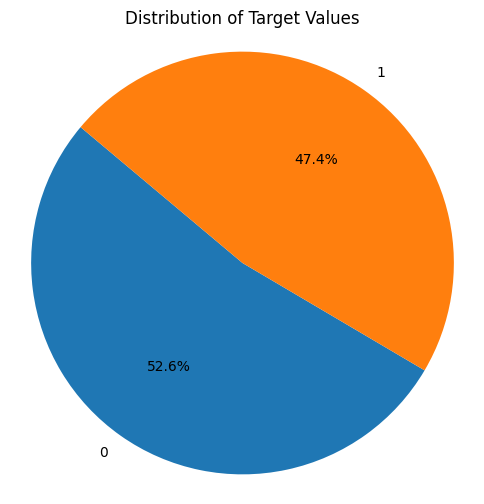

In [ ]:
# Create a pie chart
target_counts = loan_applicants_data['TARGET'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=['0', '1'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Values')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [ ]:
#Finding correlation with target
corrs_with_target = loan_applicants_data.corr()['TARGET'].sort_values()
print (corrs_with_target)

<ipython-input-8-37c190e961ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs_with_target = loan_applicants_data.corr()['TARGET'].sort_values()


EXT_SOURCE_3                  -0.32
EXT_SOURCE_2                  -0.28
DAYS_EMPLOYED                 -0.09
AMT_GOODS_PRICE               -0.08
REGION_POPULATION_RELATIVE    -0.07
AMT_CREDIT                    -0.06
FLAG_DOCUMENT_6               -0.06
HOUR_APPR_PROCESS_START       -0.05
FLAG_PHONE                    -0.04
AMT_ANNUITY                   -0.03
AMT_REQ_CREDIT_BUREAU_MON     -0.03
FLAG_DOCUMENT_16              -0.03
FLAG_DOCUMENT_13              -0.02
FLAG_DOCUMENT_8               -0.02
FLAG_DOCUMENT_14              -0.02
FLAG_DOCUMENT_18              -0.02
FLAG_DOCUMENT_15              -0.01
FLAG_DOCUMENT_9               -0.01
FLAG_DOCUMENT_11              -0.01
FLAG_DOCUMENT_4               -0.01
FLAG_EMAIL                    -0.01
FLAG_DOCUMENT_5               -0.00
FLAG_DOCUMENT_10              -0.00
FLAG_DOCUMENT_17              -0.00
AMT_REQ_CREDIT_BUREAU_QRT     -0.00
FLAG_DOCUMENT_7               -0.00
FLAG_DOCUMENT_19              -0.00
AMT_INCOME_TOTAL            

In [ ]:
#Missing data -
#check the number of missing value in each column
missing_values_count = loan_applicants_data.isnull().sum()
missing_values_count = missing_values_count.sort_values(ascending=False)
print(missing_values_count)


EXT_SOURCE_3                   8966
AMT_REQ_CREDIT_BUREAU_YEAR     6431
AMT_REQ_CREDIT_BUREAU_QRT      6431
AMT_REQ_CREDIT_BUREAU_MON      6431
AMT_REQ_CREDIT_BUREAU_WEEK     6431
AMT_REQ_CREDIT_BUREAU_DAY      6431
AMT_REQ_CREDIT_BUREAU_HOUR     6431
NAME_TYPE_SUITE                 159
DEF_60_CNT_SOCIAL_CIRCLE        105
OBS_30_CNT_SOCIAL_CIRCLE        105
DEF_30_CNT_SOCIAL_CIRCLE        105
OBS_60_CNT_SOCIAL_CIRCLE        105
EXT_SOURCE_2                     91
AMT_GOODS_PRICE                  48
AMT_ANNUITY                       1
CNT_FAM_MEMBERS                   1
FLAG_DOCUMENT_18                  0
FLAG_DOCUMENT_5                   0
FLAG_DOCUMENT_21                  0
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_19                  0
DAYS_LAST_PHONE_CHANGE            0
FLAG_DOCUMENT_2                   0
FLAG_DOCUMENT_3                   0
FLAG_DOCUMENT_4                   0
FLAG_DOCUMENT_6                   0
FLAG_DOCUMENT_17                  0
FLAG_DOCUMENT_7             

In [ ]:
#checking column-wise null percentages
cols = pd.DataFrame(loan_applicants_data.isnull().mean().round(4) * 100, columns=['percentage_missing_value'])
cols = cols.sort_values(by='percentage_missing_value', ascending=False)
print(cols)


                             percentage_missing_value
EXT_SOURCE_3                                    21.12
AMT_REQ_CREDIT_BUREAU_YEAR                      15.15
AMT_REQ_CREDIT_BUREAU_QRT                       15.15
AMT_REQ_CREDIT_BUREAU_MON                       15.15
AMT_REQ_CREDIT_BUREAU_WEEK                      15.15
AMT_REQ_CREDIT_BUREAU_DAY                       15.15
AMT_REQ_CREDIT_BUREAU_HOUR                      15.15
NAME_TYPE_SUITE                                  0.37
OBS_30_CNT_SOCIAL_CIRCLE                         0.25
DEF_30_CNT_SOCIAL_CIRCLE                         0.25
OBS_60_CNT_SOCIAL_CIRCLE                         0.25
DEF_60_CNT_SOCIAL_CIRCLE                         0.25
EXT_SOURCE_2                                     0.21
AMT_GOODS_PRICE                                  0.11
FLAG_DOCUMENT_8                                  0.00
DAYS_LAST_PHONE_CHANGE                           0.00
FLAG_DOCUMENT_2                                  0.00
FLAG_DOCUMENT_3             

In [ ]:
# Select the columns with missing value for futher look and choosing best imputation technique
selected_columns = ['AMT_GOODS_PRICE','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','NAME_TYPE_SUITE','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_3','AMT_ANNUITY','CNT_FAM_MEMBERS']
loan_applicants_data[selected_columns].dtypes

AMT_GOODS_PRICE               float64
EXT_SOURCE_2                  float64
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_SOCIAL_CIRCLE      float64
NAME_TYPE_SUITE                object
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
EXT_SOURCE_3                  float64
AMT_ANNUITY                   float64
CNT_FAM_MEMBERS               float64
dtype: object

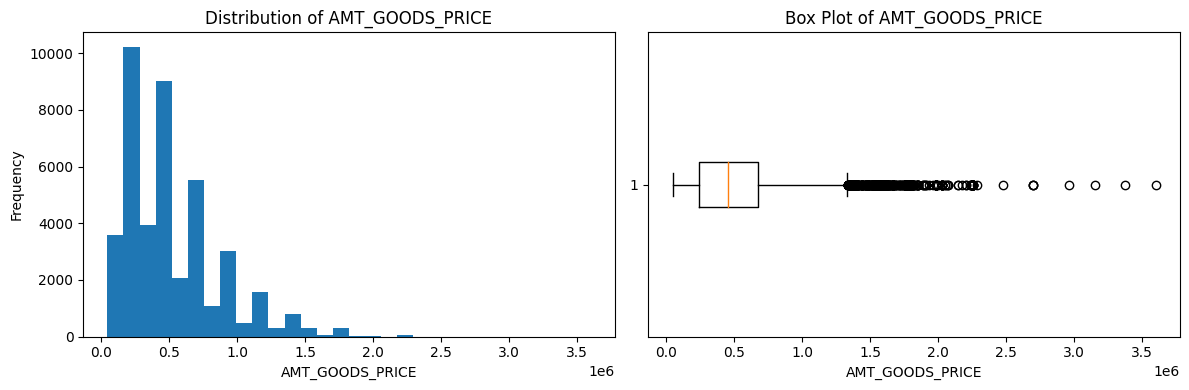

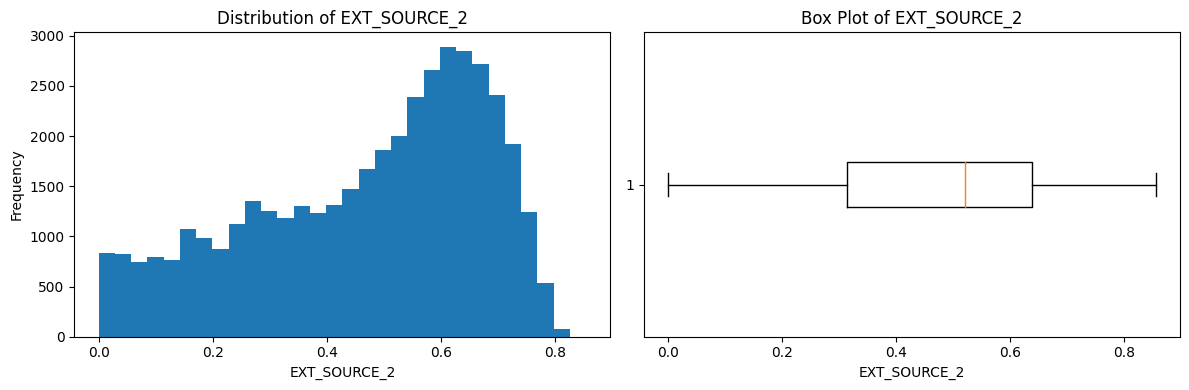

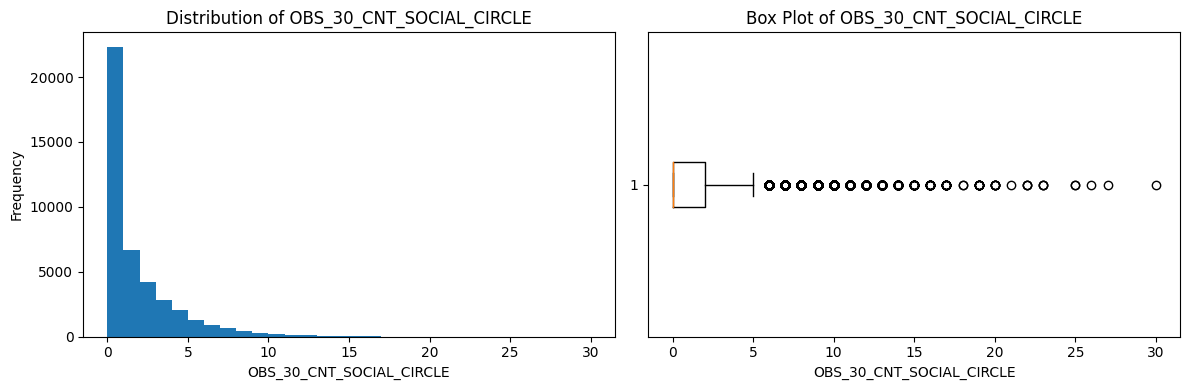

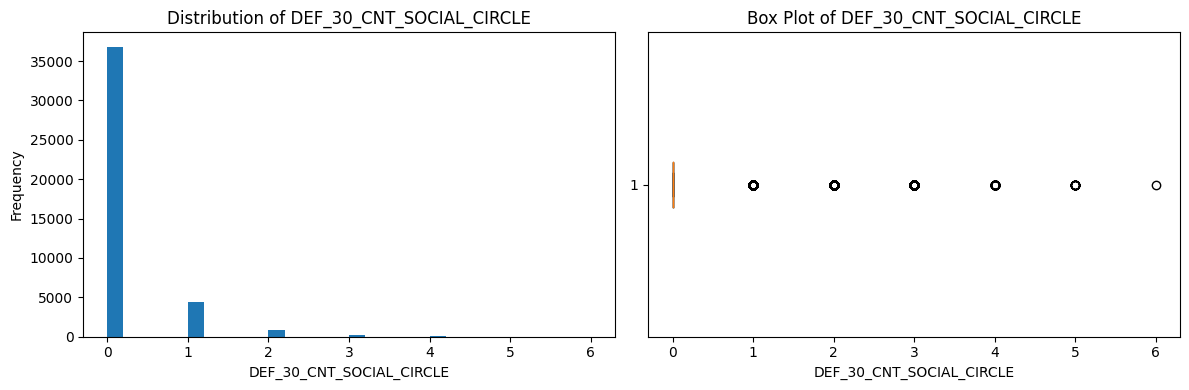

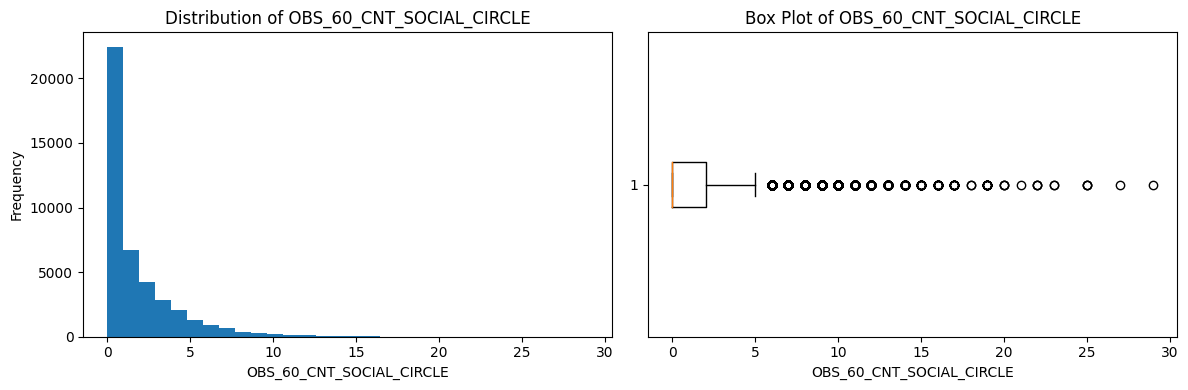

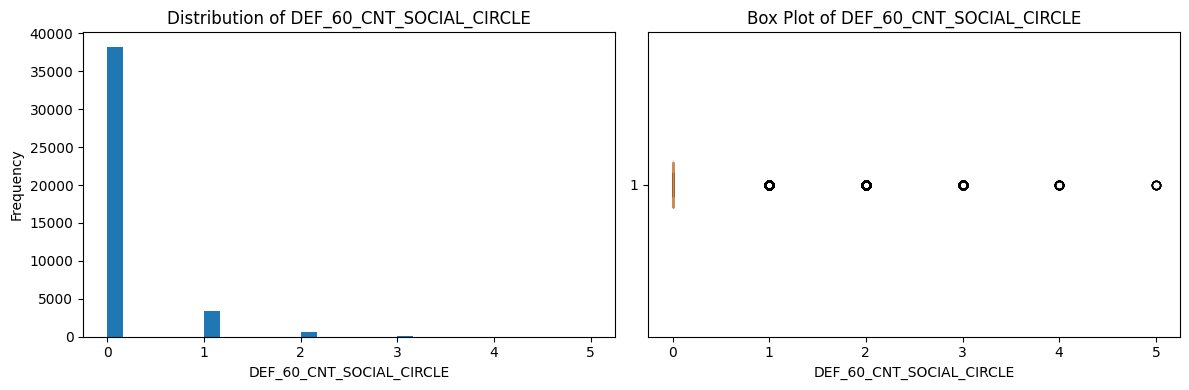

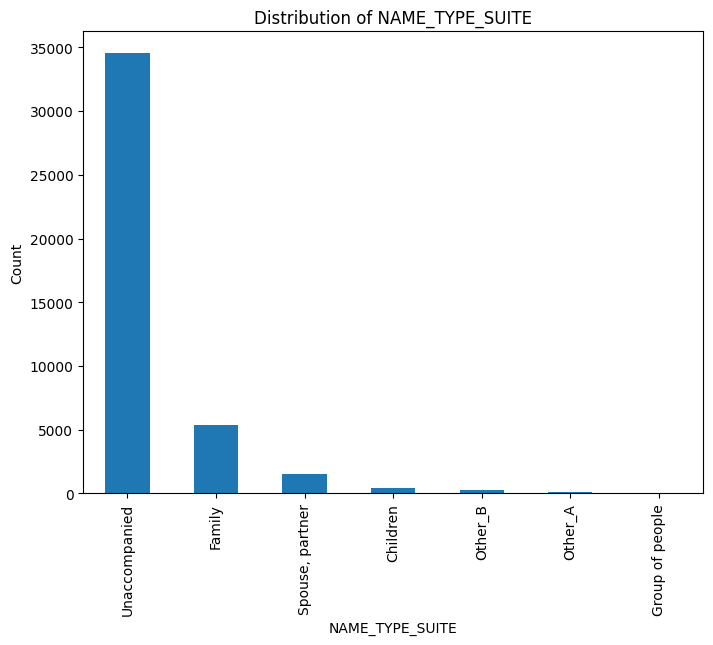

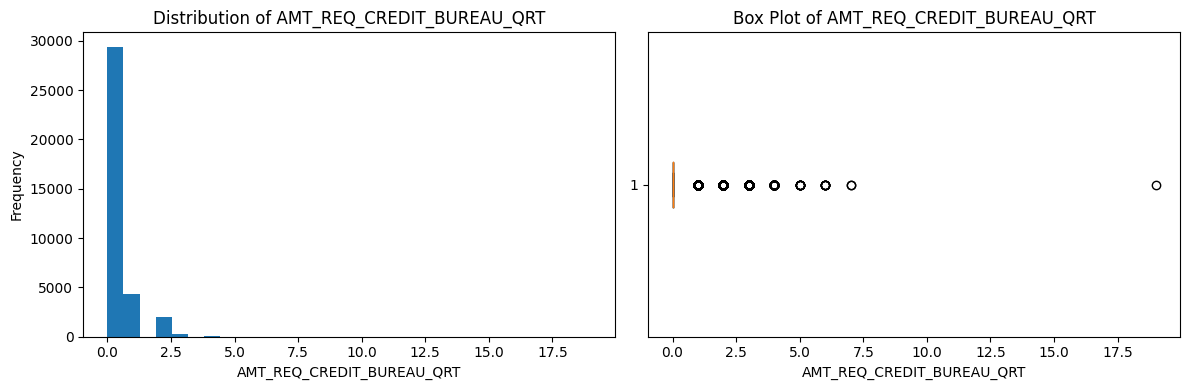

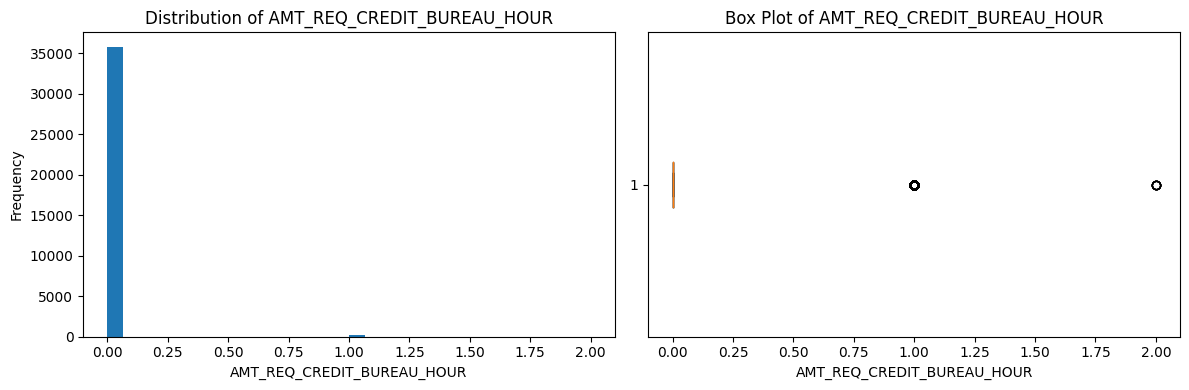

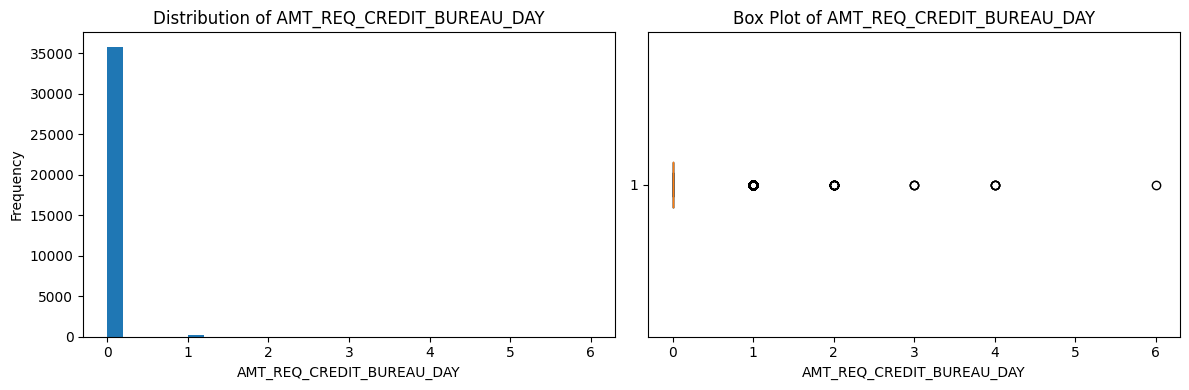

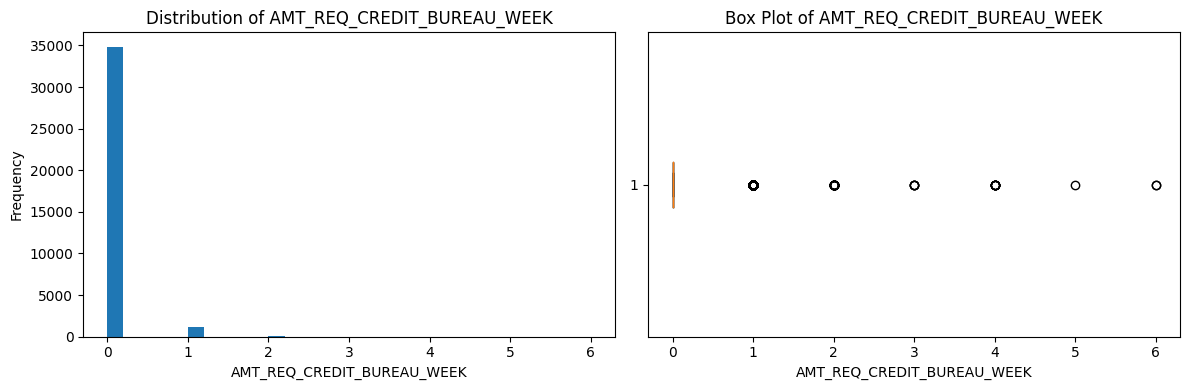

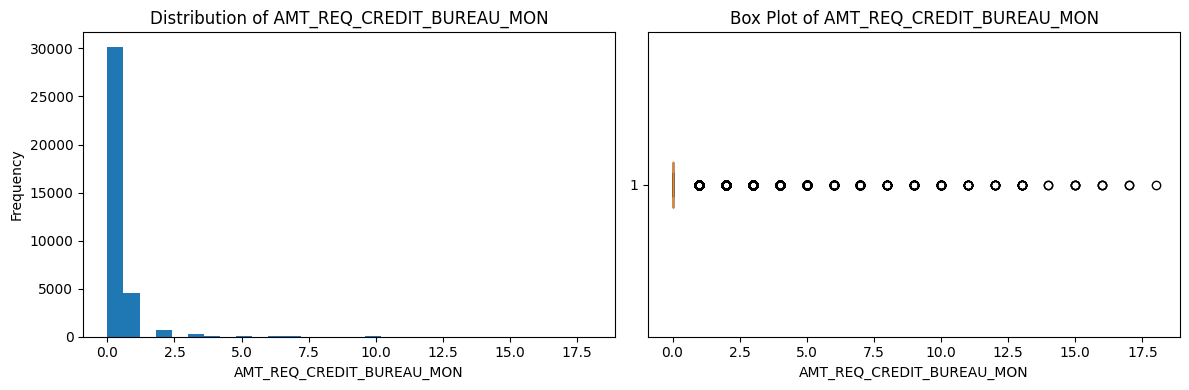

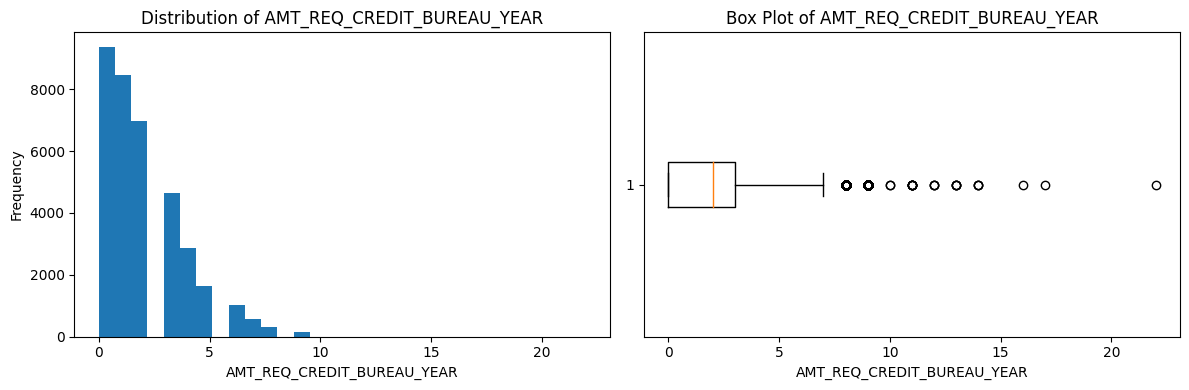

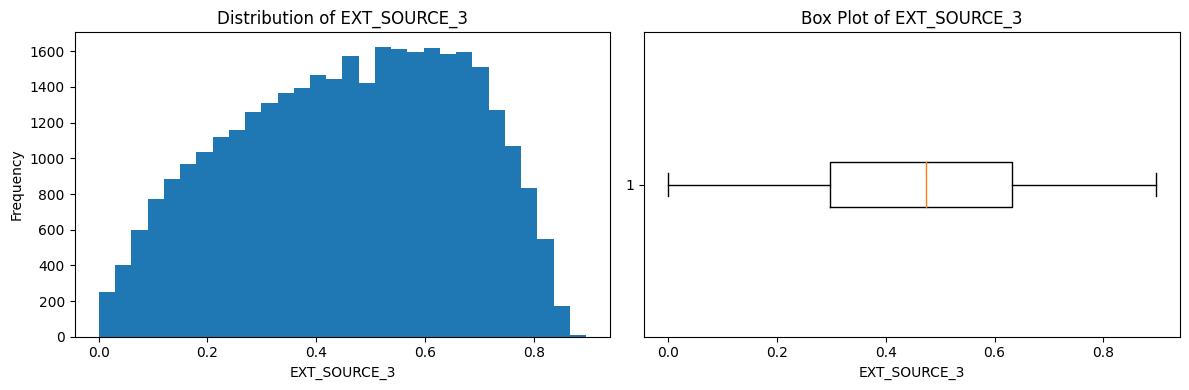

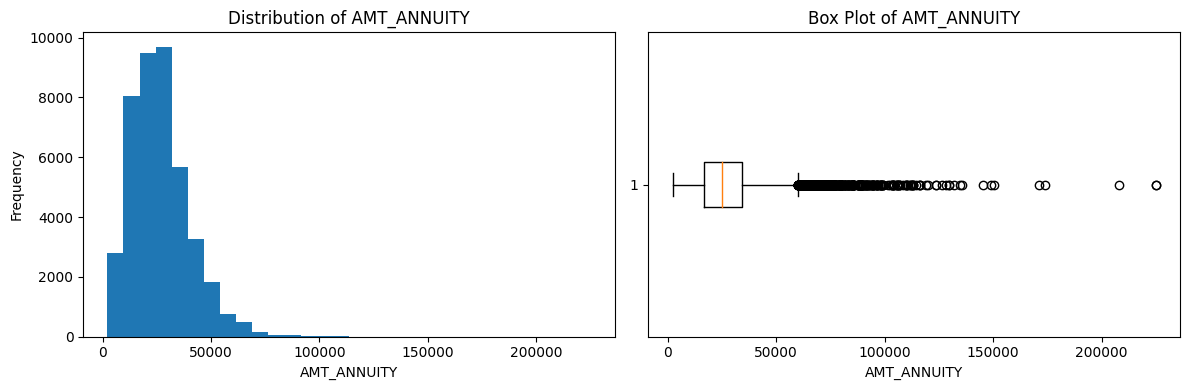

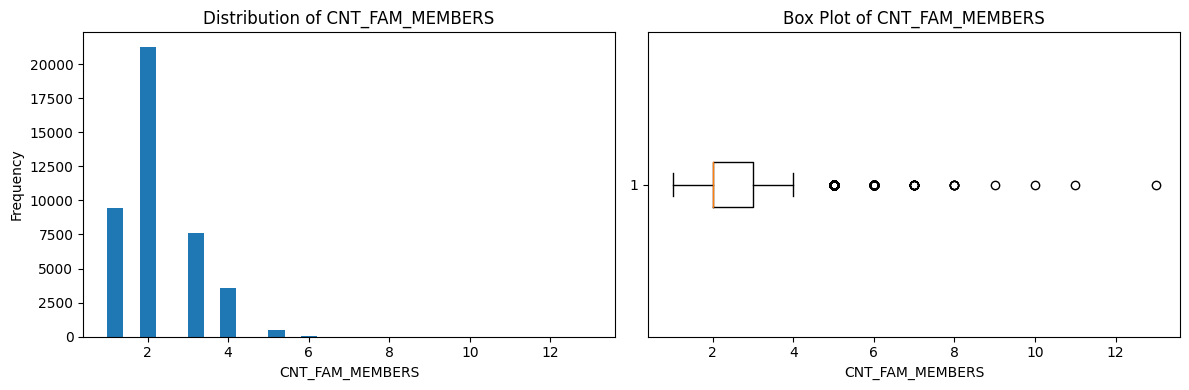

In [ ]:
# histograms and box plots view of missing value columns
for column in selected_columns:
    if loan_applicants_data[column].dtype == 'float64' :
        # Create histograms and box plots for numerical columns
        plt.figure(figsize=(12, 4))

        # Create histograms
        plt.subplot(1, 2, 1)
        plt.hist(loan_applicants_data[column].dropna(), bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Create box plots
        plt.subplot(1, 2, 2)
        plt.boxplot(loan_applicants_data[column].dropna(), vert=False)
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)

        plt.tight_layout()
        plt.show()

    elif loan_applicants_data[column].dtype == 'object':
        # Create bar plots for categorical columns
        plt.figure(figsize=(8, 6))
        loan_applicants_data[column].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

In [ ]:
#Summary statistic
pd.options.display.float_format = '{:.2f}'.format
print("AMT_GOODS_PRICE Summary:")
print(loan_applicants_data['AMT_GOODS_PRICE'].describe())       # Summary statistics
median = loan_applicants_data['AMT_GOODS_PRICE'].median() #median
print("median", median)


AMT_GOODS_PRICE Summary:
count     42404.00
mean     517317.80
std      346876.96
min       45000.00
25%      238500.00
50%      450000.00
75%      675000.00
max     3600000.00
Name: AMT_GOODS_PRICE, dtype: float64
median 450000.0


In [ ]:
#Number of missing values in AMT_GOODS_PRICE
loan_applicants_data['AMT_GOODS_PRICE'].isnull().sum()

48

In [ ]:
#OBS_30_CNT_SOCIAL_CIRCLE
loan_applicants_data['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.00     22324
1.00      6709
2.00      4228
3.00      2800
4.00      2068
5.00      1326
6.00       940
7.00       659
8.00       403
9.00       272
10.00      208
11.00      118
12.00      100
13.00       67
14.00       41
15.00       21
16.00       18
17.00       15
19.00       10
20.00        6
22.00        3
23.00        3
18.00        2
25.00        2
30.00        1
27.00        1
26.00        1
21.00        1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [ ]:
# Calculating percentage of each record in the dataframe
loan_applicants_data['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)*100

0.00    52.72
1.00    15.84
2.00     9.98
3.00     6.61
4.00     4.88
5.00     3.13
6.00     2.22
7.00     1.56
8.00     0.95
9.00     0.64
10.00    0.49
11.00    0.28
12.00    0.24
13.00    0.16
14.00    0.10
15.00    0.05
16.00    0.04
17.00    0.04
19.00    0.02
20.00    0.01
22.00    0.01
23.00    0.01
18.00    0.00
25.00    0.00
30.00    0.00
27.00    0.00
26.00    0.00
21.00    0.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
#DEF_30_CNT_SOCIAL_CIRCLE
loan_applicants_data['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.00    36815
1.00     4352
2.00      909
3.00      208
4.00       46
5.00       16
6.00        1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [ ]:
# Calculating percentage of each record in the dataframe
loan_applicants_data['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)*100

0.00   86.94
1.00   10.28
2.00    2.15
3.00    0.49
4.00    0.11
5.00    0.04
6.00    0.00
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
#OBS_60_CNT_SOCIAL_CIRCLE
loan_applicants_data['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.00     22438
1.00      6718
2.00      4204
3.00      2807
4.00      2038
5.00      1309
6.00       939
7.00       640
8.00       387
9.00       268
10.00      207
11.00      112
12.00       95
13.00       63
14.00       39
16.00       22
15.00       20
19.00       13
17.00       12
22.00        3
25.00        3
20.00        3
23.00        2
18.00        2
21.00        1
29.00        1
27.00        1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [ ]:
# Calculating percentage of each record in the dataframe
loan_applicants_data['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)*100

0.00    52.99
1.00    15.86
2.00     9.93
3.00     6.63
4.00     4.81
5.00     3.09
6.00     2.22
7.00     1.51
8.00     0.91
9.00     0.63
10.00    0.49
11.00    0.26
12.00    0.22
13.00    0.15
14.00    0.09
16.00    0.05
15.00    0.05
19.00    0.03
17.00    0.03
22.00    0.01
25.00    0.01
20.00    0.01
23.00    0.00
18.00    0.00
21.00    0.00
29.00    0.00
27.00    0.00
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
#DEF_60_CNT_SOCIAL_CIRCLE
loan_applicants_data['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.00    38228
1.00     3417
2.00      562
3.00      112
4.00       23
5.00        5
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [ ]:
# Calculating percentage of each record in the dataframe
loan_applicants_data['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)*100

0.00   90.27
1.00    8.07
2.00    1.33
3.00    0.26
4.00    0.05
5.00    0.01
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
#NAME_TYPE_SUITE
loan_applicants_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      34524
Family              5341
Spouse, partner     1541
Children             429
Other_B              291
Other_A              129
Group of people       38
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
# Calculating percentage of each record in the dataframe
loan_applicants_data['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

Unaccompanied     81.63
Family            12.63
Spouse, partner    3.64
Children           1.01
Other_B            0.69
Other_A            0.31
Group of people    0.09
Name: NAME_TYPE_SUITE, dtype: float64

In [ ]:
#AMT_REQ_CREDIT_BUREAU_QRT
loan_applicants_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.00     29379
1.00      4327
2.00      1989
3.00       231
4.00        76
5.00         9
6.00         7
7.00         2
19.00        1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [ ]:
# Calculating percentage of each record in the dataframe
loan_applicants_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)*100

0.00    81.56
1.00    12.01
2.00     5.52
3.00     0.64
4.00     0.21
5.00     0.02
6.00     0.02
7.00     0.01
19.00    0.00
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [ ]:
#AMT_REQ_CREDIT_BUREAU_HOUR
loan_applicants_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.00    35791
1.00      224
2.00        6
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [ ]:
# Calculating percentage of each record in the dataframe
loan_applicants_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)*100

0.00   99.36
1.00    0.62
2.00    0.02
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [ ]:
#AMT_REQ_CREDIT_BUREAU_DAY
loan_applicants_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.00    35811
1.00      187
2.00       15
4.00        4
3.00        3
6.00        1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [ ]:
# Calculating percentage of each record in the dataframe
loan_applicants_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)*100

0.00   99.42
1.00    0.52
2.00    0.04
4.00    0.01
3.00    0.01
6.00    0.00
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [ ]:
#AMT_REQ_CREDIT_BUREAU_WEEK
loan_applicants_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.00    34826
1.00     1148
2.00       32
4.00        8
3.00        4
6.00        2
5.00        1
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [ ]:
# Calculating percentage of each record in the dataframe
loan_applicants_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100

0.00   96.68
1.00    3.19
2.00    0.09
4.00    0.02
3.00    0.01
6.00    0.01
5.00    0.00
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [ ]:
#AMT_REQ_CREDIT_BUREAU_MON
loan_applicants_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.00     30165
1.00      4505
2.00       722
3.00       260
4.00       126
5.00        75
7.00        41
6.00        29
10.00       24
9.00        22
8.00        15
13.00        9
11.00        9
12.00        7
15.00        4
16.00        3
17.00        2
14.00        2
18.00        1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [ ]:
# Calculating percentage of each record in the dataframe
loan_applicants_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)*100

0.00    83.74
1.00    12.51
2.00     2.00
3.00     0.72
4.00     0.35
5.00     0.21
7.00     0.11
6.00     0.08
10.00    0.07
9.00     0.06
8.00     0.04
13.00    0.02
11.00    0.02
12.00    0.02
15.00    0.01
16.00    0.01
17.00    0.01
14.00    0.01
18.00    0.00
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [ ]:
#AMT_REQ_CREDIT_BUREAU_YEAR
loan_applicants_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.00     9369
1.00     8452
2.00     6961
3.00     4630
4.00     2883
5.00     1650
6.00     1016
7.00      570
8.00      304
9.00      164
11.00       7
13.00       4
14.00       3
12.00       3
10.00       2
16.00       1
22.00       1
17.00       1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [ ]:
# Calculating percentage of each record in the dataframe
loan_applicants_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)*100

0.00    26.01
1.00    23.46
2.00    19.32
3.00    12.85
4.00     8.00
5.00     4.58
6.00     2.82
7.00     1.58
8.00     0.84
9.00     0.46
11.00    0.02
13.00    0.01
14.00    0.01
12.00    0.01
10.00    0.01
16.00    0.00
22.00    0.00
17.00    0.00
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [ ]:
# Impute the missing value

# Define the columns and their respective imputation methods
impute_methods = {
    'AMT_GOODS_PRICE': 'median',
    'EXT_SOURCE_2': 'median',
    'OBS_30_CNT_SOCIAL_CIRCLE': 'mode',
    'DEF_30_CNT_SOCIAL_CIRCLE': 'mode',
    'OBS_60_CNT_SOCIAL_CIRCLE': 'mode',
    'DEF_60_CNT_SOCIAL_CIRCLE': 'mode',
    'NAME_TYPE_SUITE': 'mode',
    'AMT_REQ_CREDIT_BUREAU_QRT': 'mode',
    'AMT_REQ_CREDIT_BUREAU_HOUR': 'mode',
    'AMT_REQ_CREDIT_BUREAU_DAY': 'mode',
    'AMT_REQ_CREDIT_BUREAU_WEEK': 'mode',
    'AMT_REQ_CREDIT_BUREAU_MON': 'mode',
    'AMT_REQ_CREDIT_BUREAU_YEAR': 'remove',
    'EXT_SOURCE_3': 'mean',
    'AMT_ANNUITY': 'median',
    'CNT_FAM_MEMBERS': 'median',
}

# Create a copy of the original DataFrame
loan_applicants_data_filled = loan_applicants_data.copy()

# Apply imputation methods
for column, method in impute_methods.items():
    if method == 'median':
        median_value = loan_applicants_data_filled[column].median()
        loan_applicants_data_filled[column].fillna(median_value, inplace=True)
    elif method == 'mode':
        mode_value = loan_applicants_data_filled[column].mode().values[0]
        loan_applicants_data_filled[column].fillna(mode_value, inplace=True)
    elif method == 'mean':
        mean_value = loan_applicants_data_filled[column].mean()
        loan_applicants_data_filled[column].fillna(mean_value, inplace=True)
    elif method == 'remove':
        loan_applicants_data_filled.dropna(subset=[column], inplace=True)


In [ ]:
#Double check the missing value
missing_values_count_filled = loan_applicants_data_filled.isnull().sum()
missing_values_count_filled = missing_values_count_filled.sort_values(ascending=False)
print(missing_values_count_filled)

SK_ID_CURR                     0
TARGET                         0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_2                0
DAYS_LAST_PHONE_CHANGE         0
DEF_60_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_30_CNT_SOCIAL_CIRCLE       0
EXT_SOURCE_3                   0
EXT_SOURCE_2                   0
ORGANIZATION_TYPE              0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_20               0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_HOUR     0
FLAG_DOCUMENT_21               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_18               0
FLAG_DOCUM

In [ ]:
#double check the file
loan_applicants_data_filled.shape


(36021, 72)

In [ ]:
# Double check no missing values in the entire DataFrame
print('Is there any NaN: ', loan_applicants_data_filled.isna().any().any())


Is there any NaN:  False


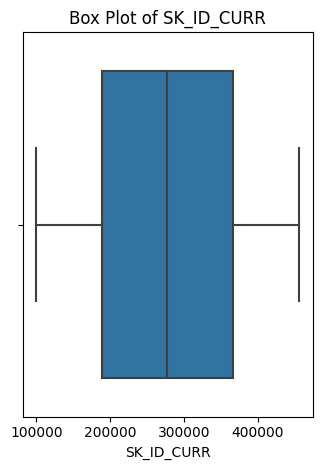

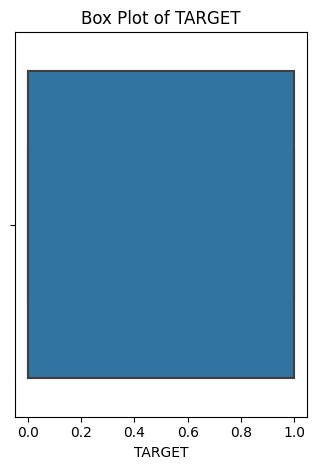

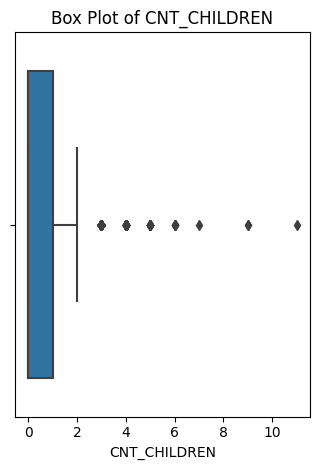

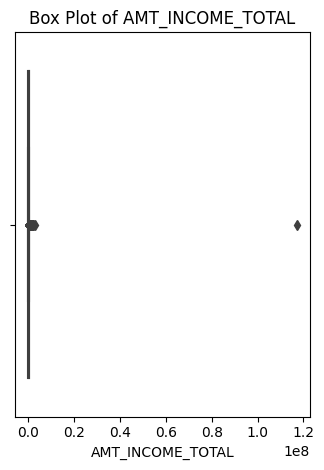

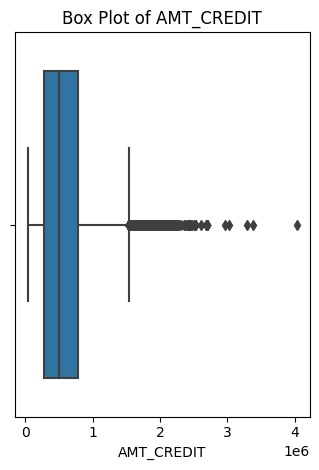

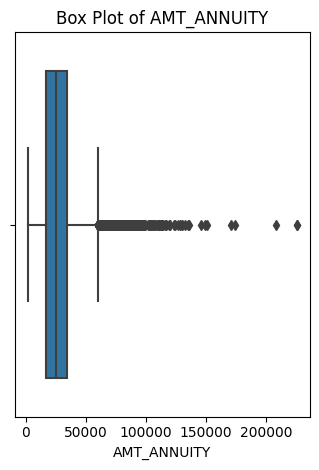

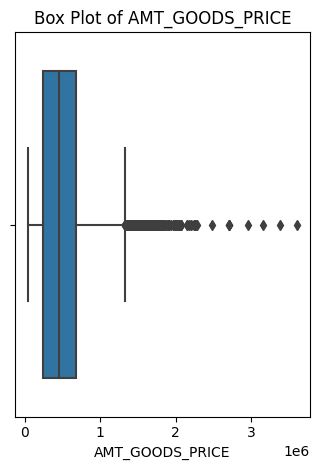

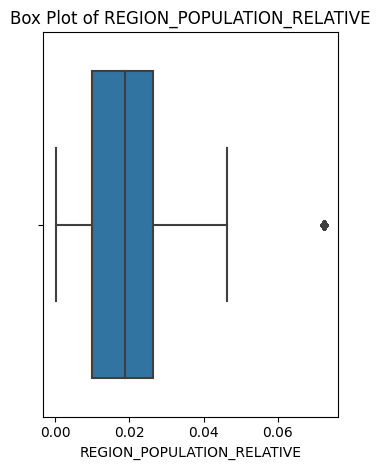

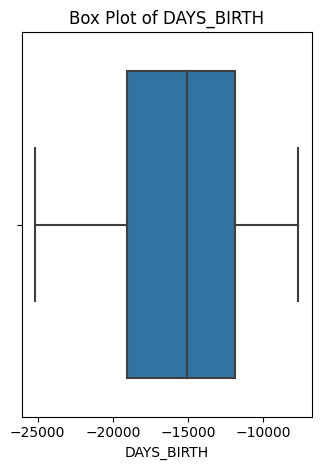

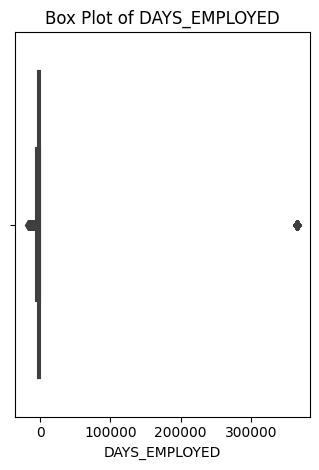

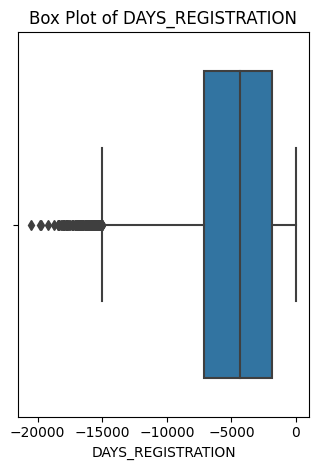

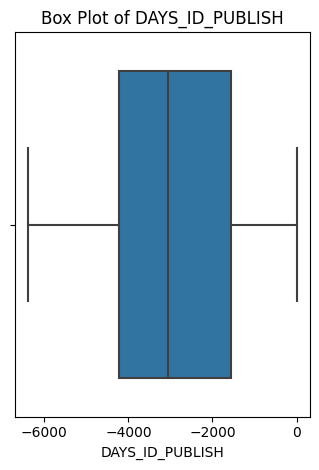

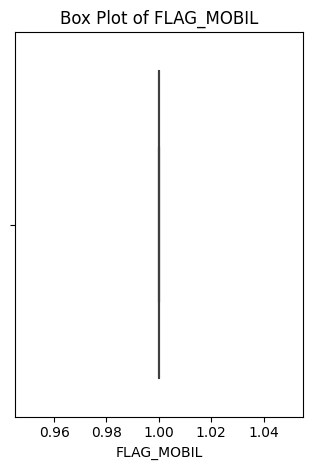

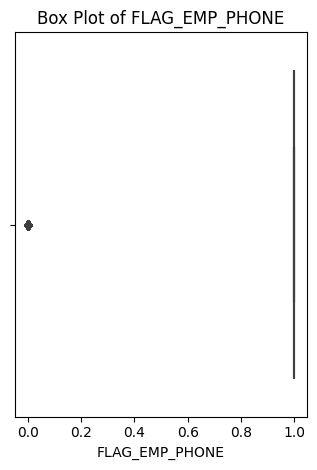

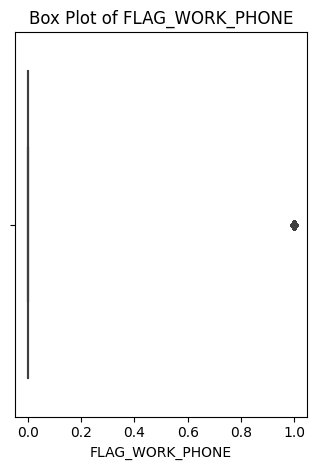

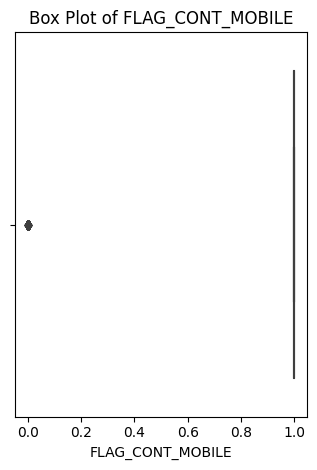

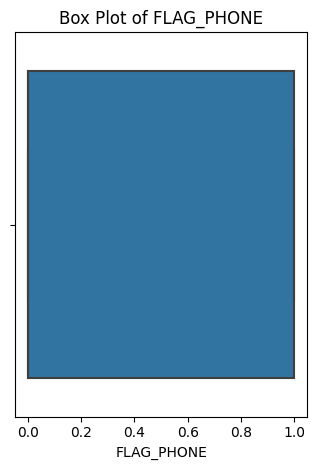

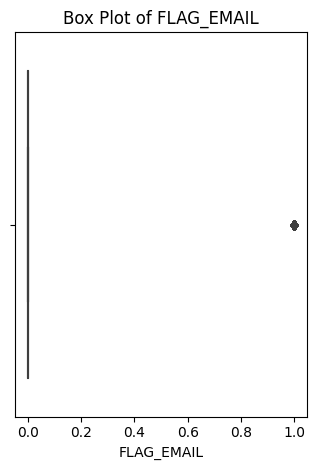

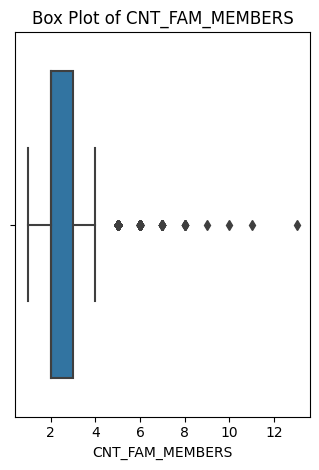

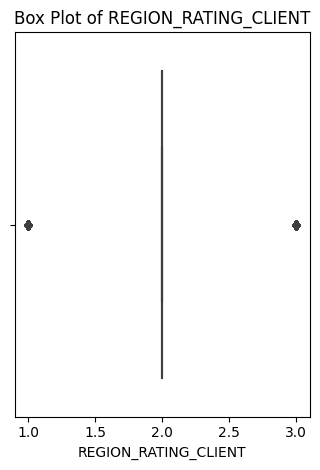

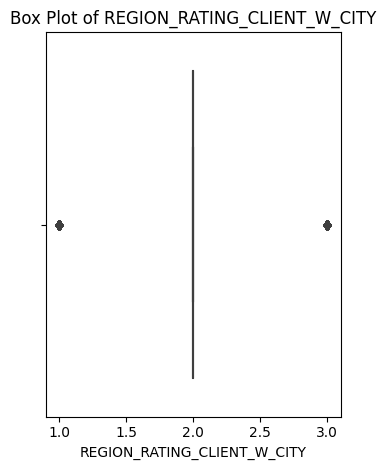

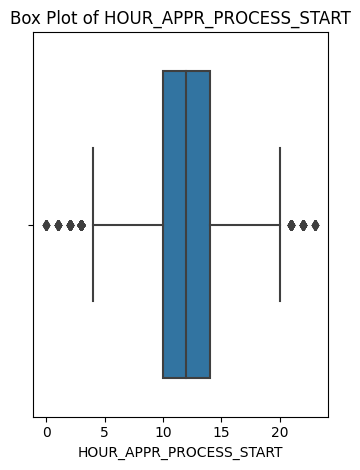

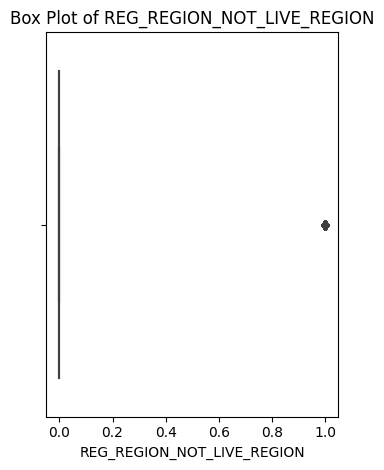

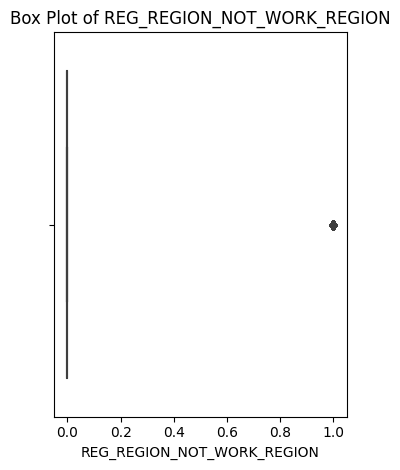

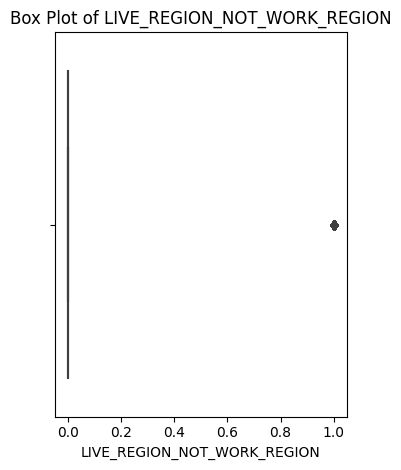

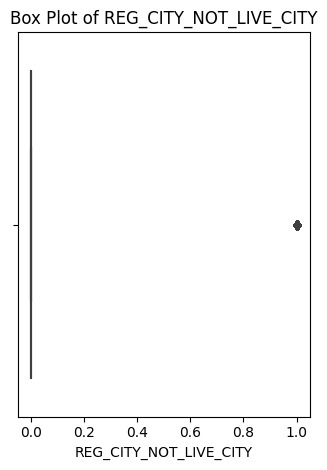

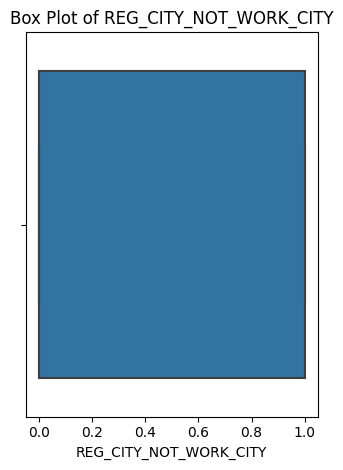

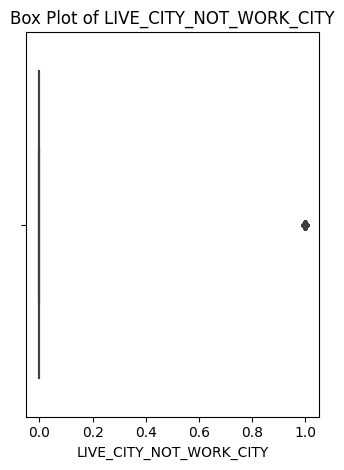

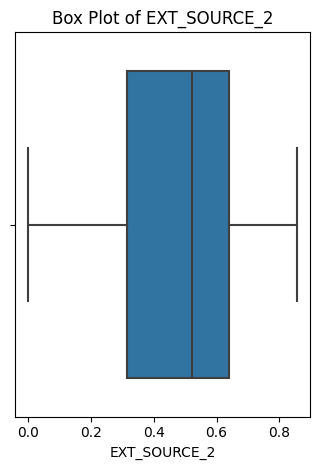

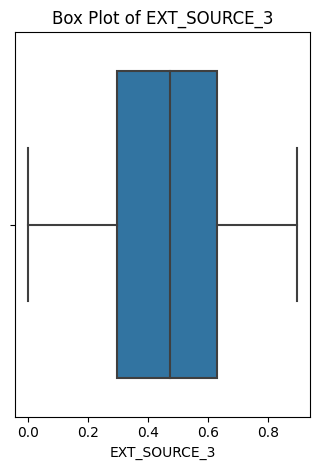

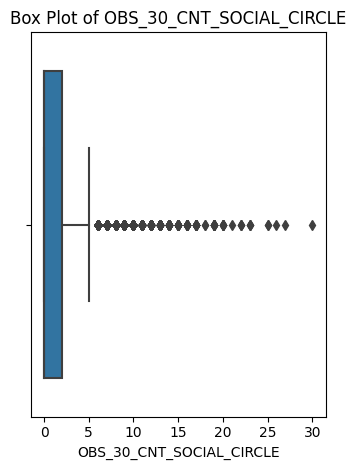

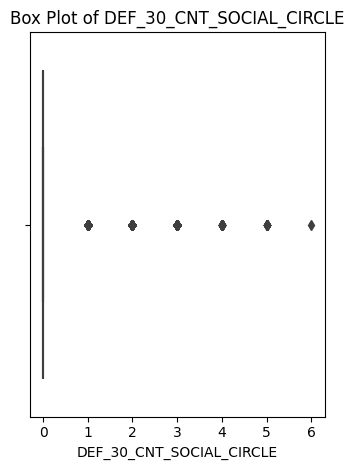

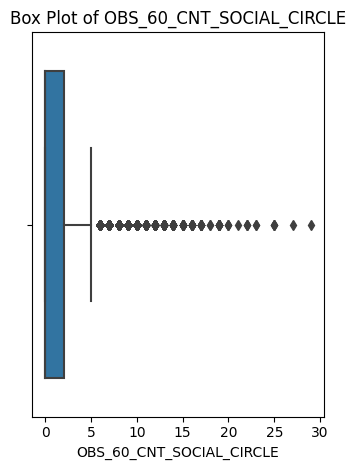

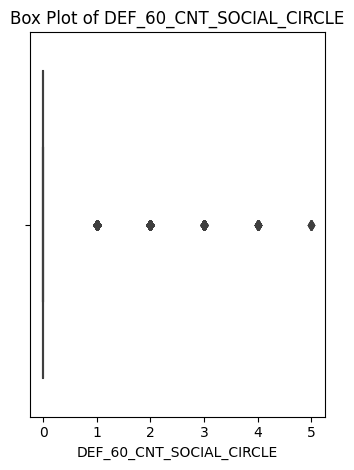

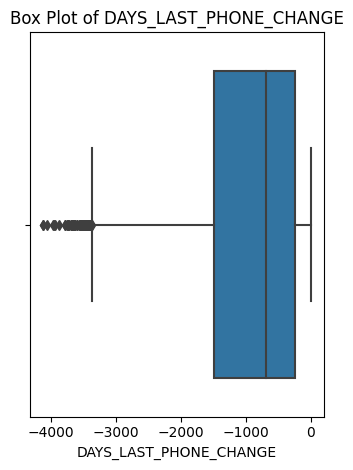

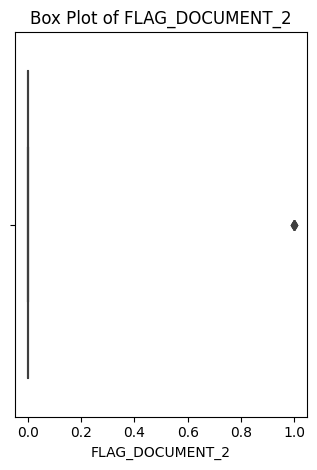

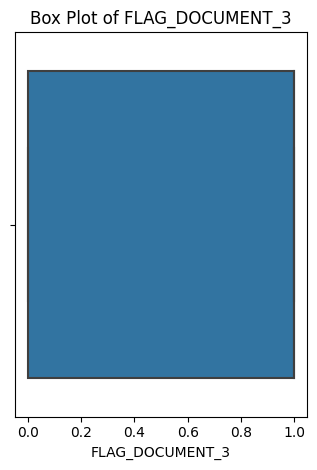

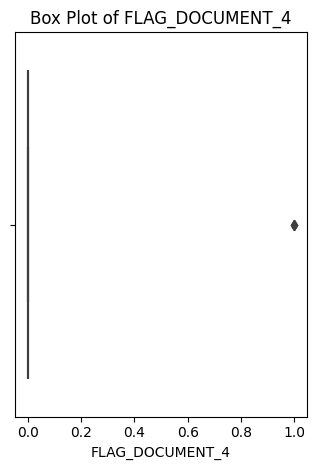

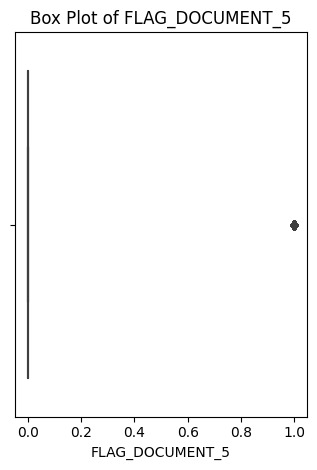

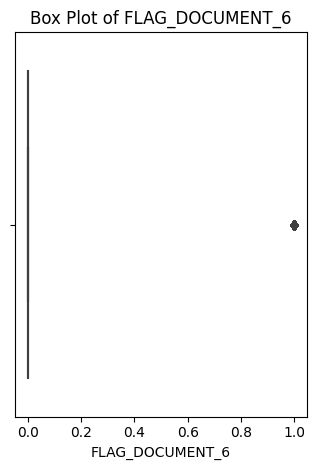

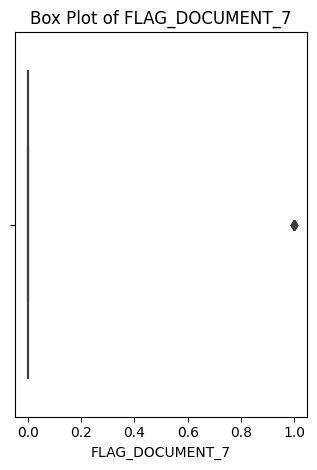

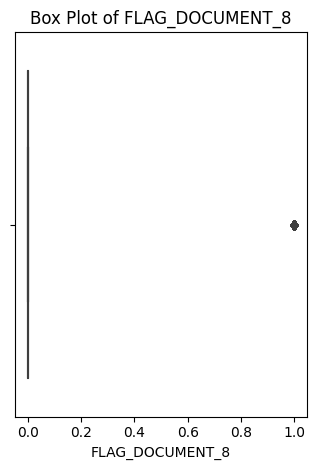

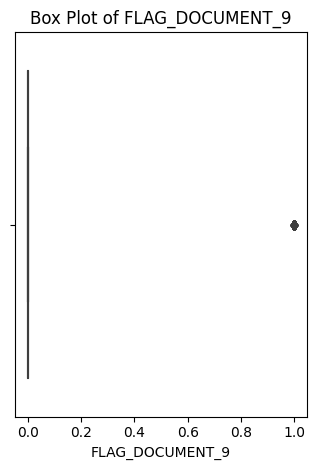

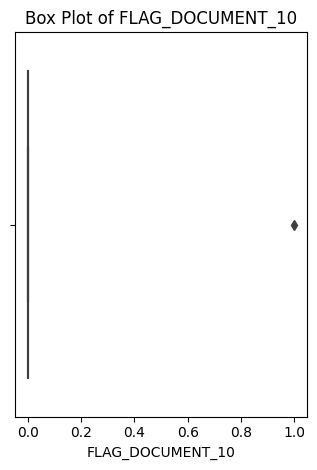

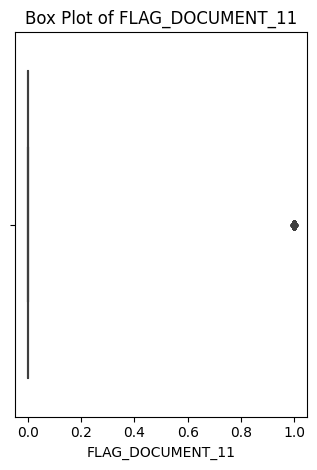

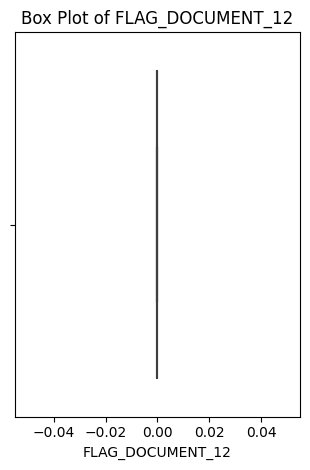

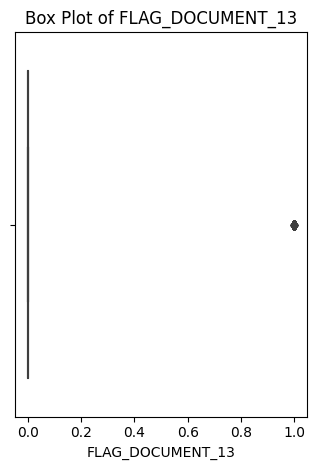

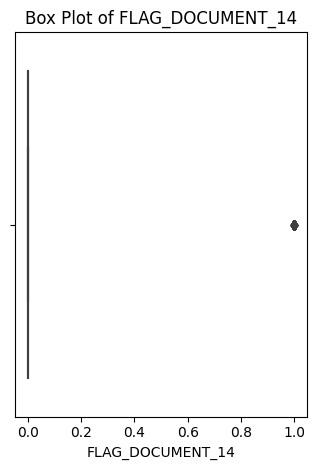

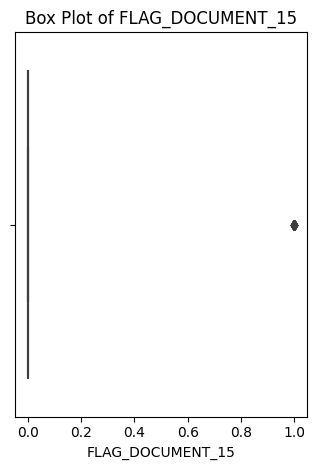

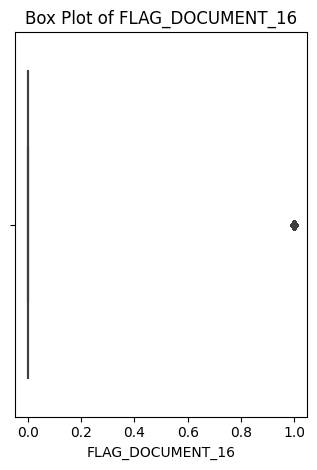

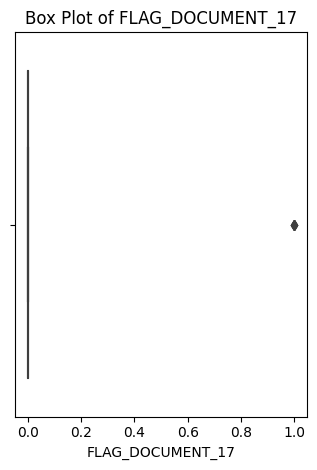

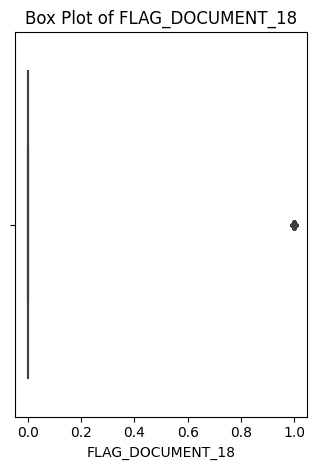

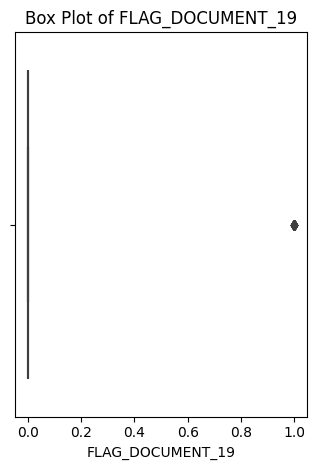

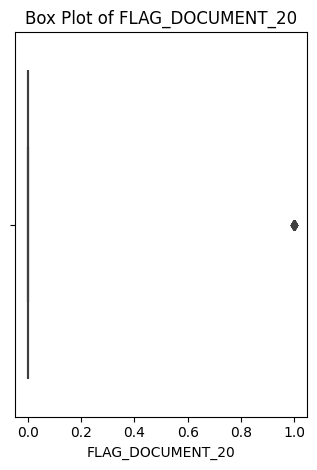

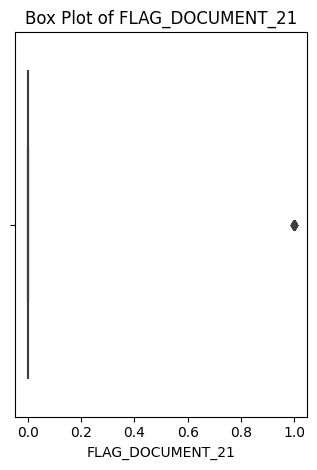

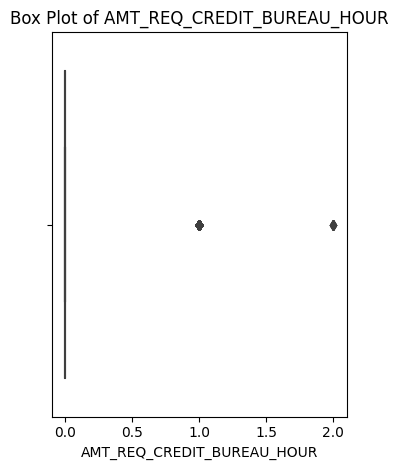

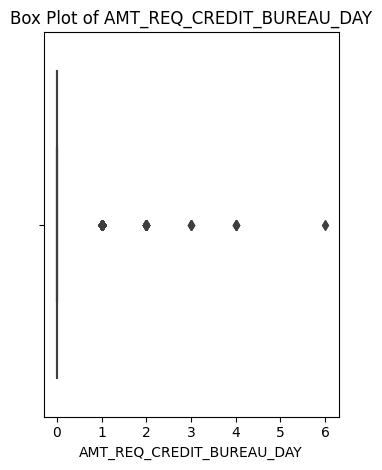

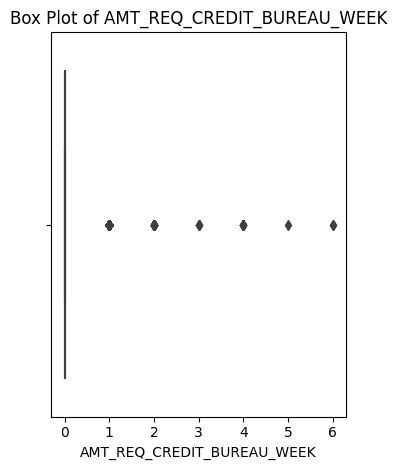

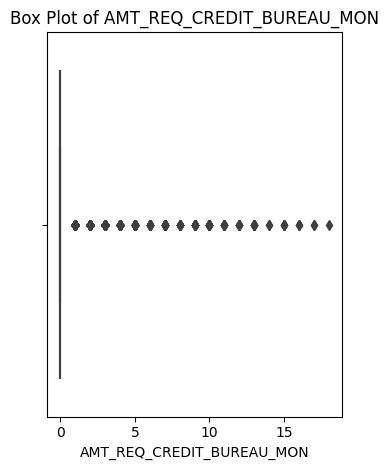

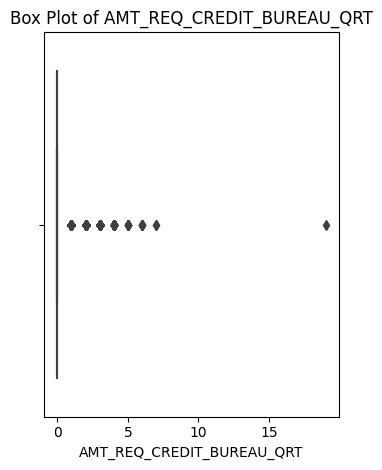

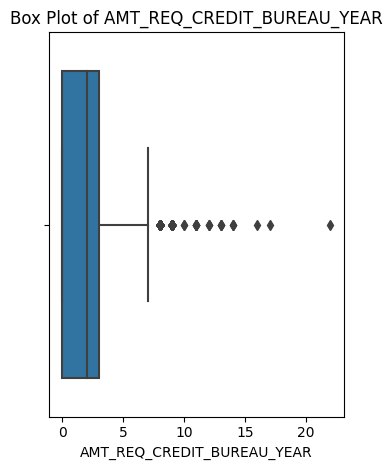

In [ ]:
#outlier
# Define numeric and categorical attributes based on data types
numeric_attributes = loan_applicants_data.select_dtypes(include=['int64', 'float64']).columns
# Visualize numeric attributes with box plots
for attribute in numeric_attributes:

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=loan_applicants_data[attribute])
    plt.title(f'Box Plot of {attribute}')

    plt.tight_layout()
    plt.show()

In [ ]:
#Handle outliers
loan_applicants_data_filled_cleaned = loan_applicants_data_filled.copy()

# Columns to handle outliers
columns_to_handle_outliers = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED','DAYS_REGISTRATION','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',]

# Loop through numerical columns and apply the IQR method
for column in columns_to_handle_outliers:
    # Calculate the IQR (Interquartile Range)
    Q1 = loan_applicants_data_filled_cleaned[column].quantile(0.25)
    Q3 = loan_applicants_data_filled_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the lower or upper bound
    loan_applicants_data_filled_cleaned[column] = loan_applicants_data_filled_cleaned[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )


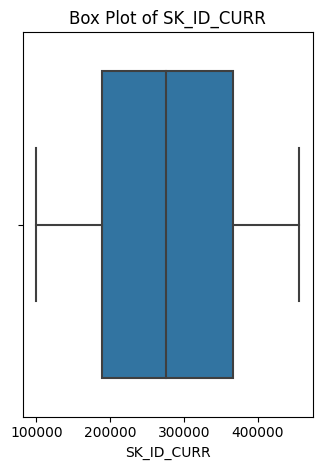

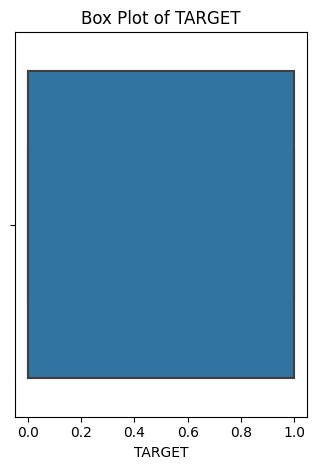

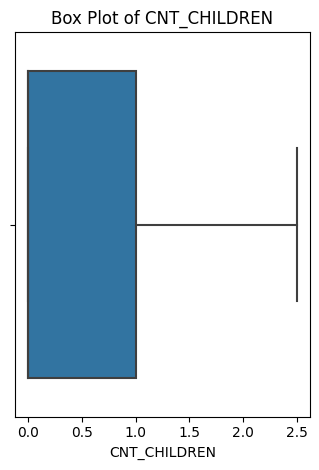

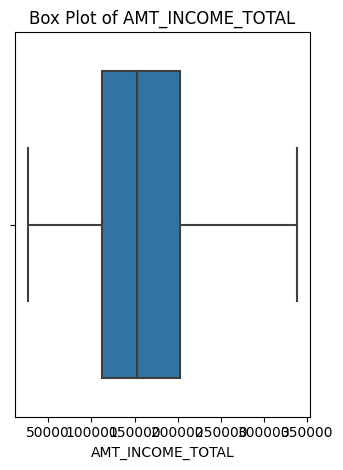

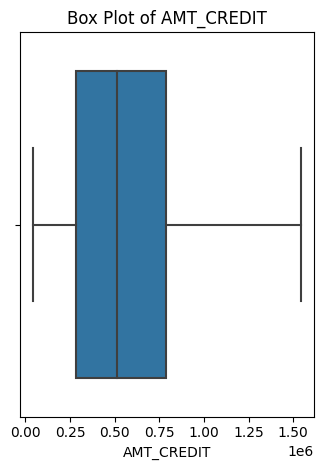

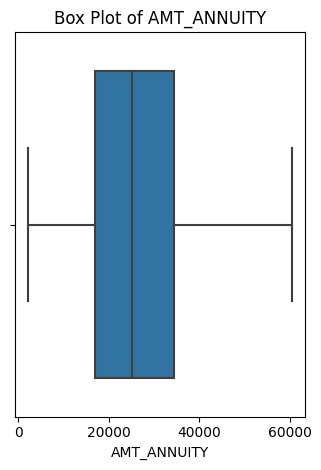

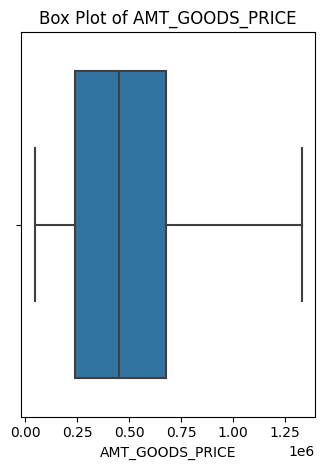

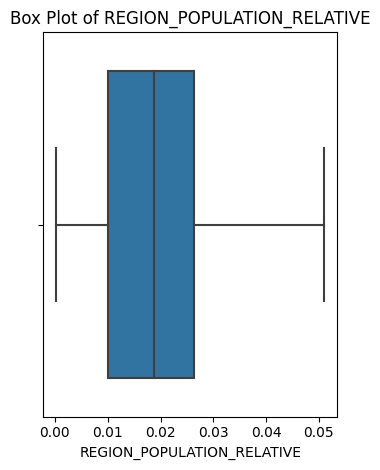

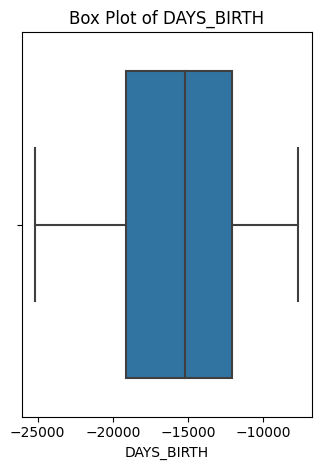

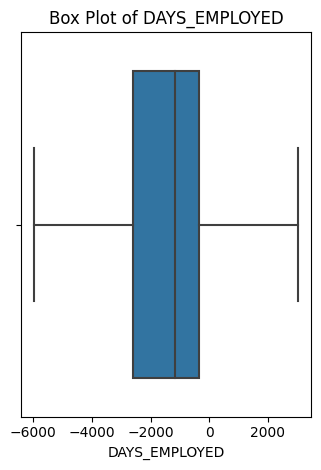

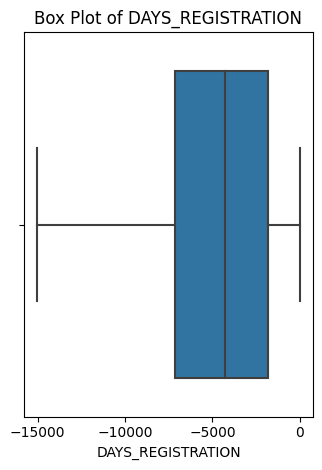

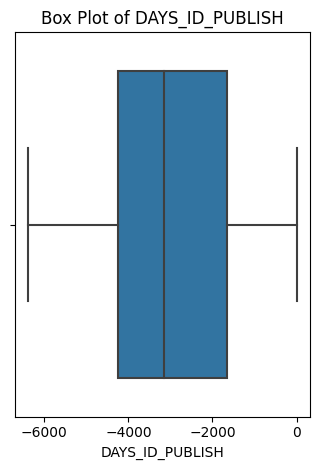

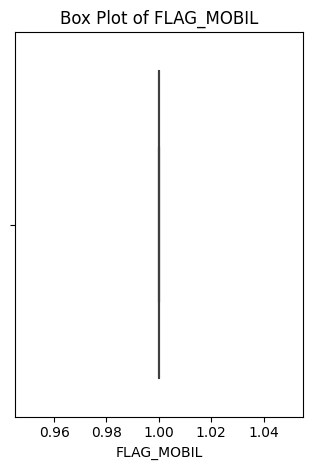

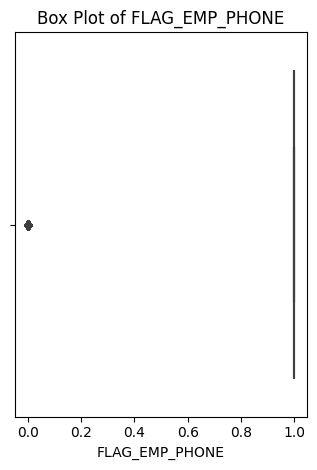

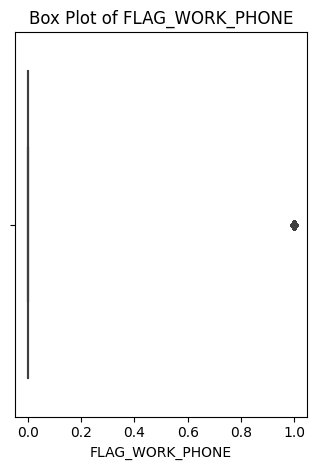

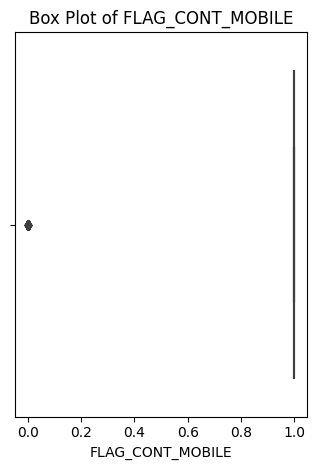

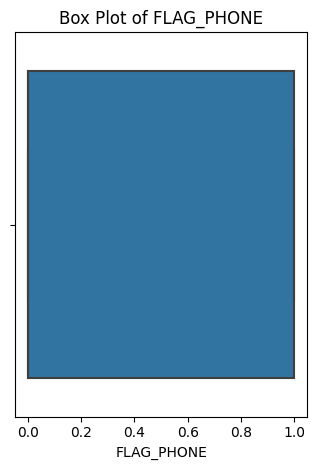

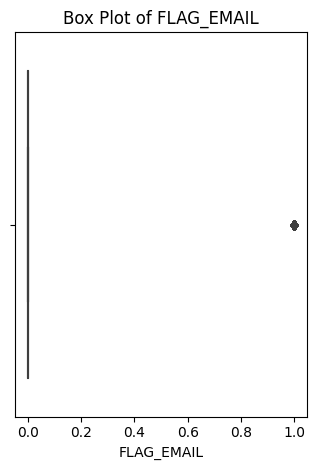

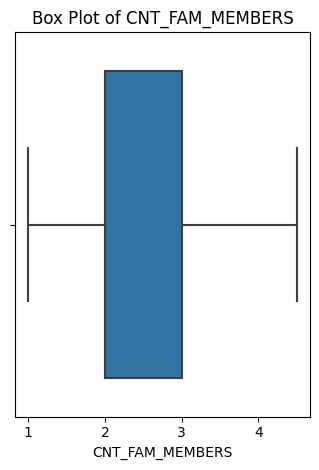

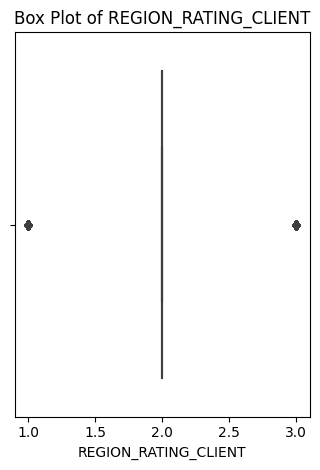

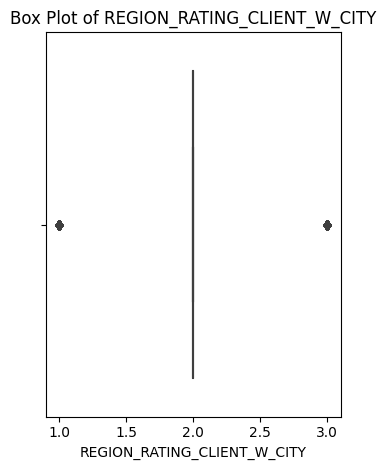

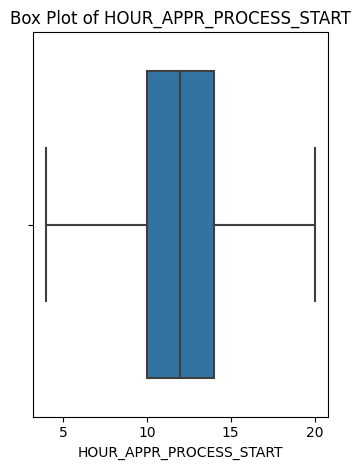

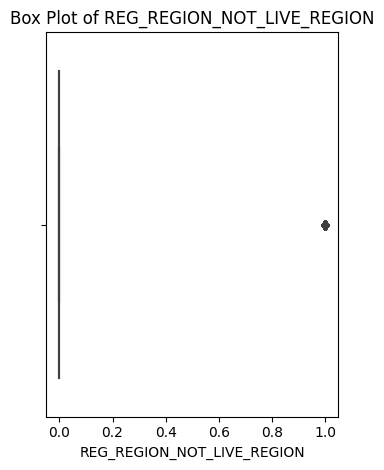

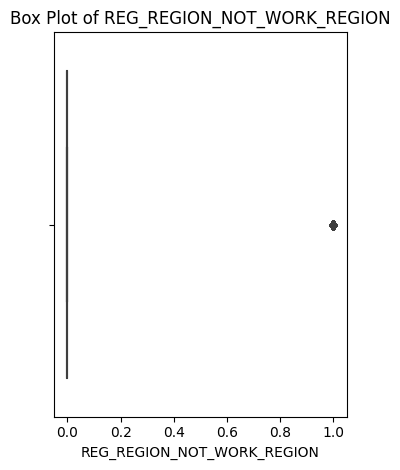

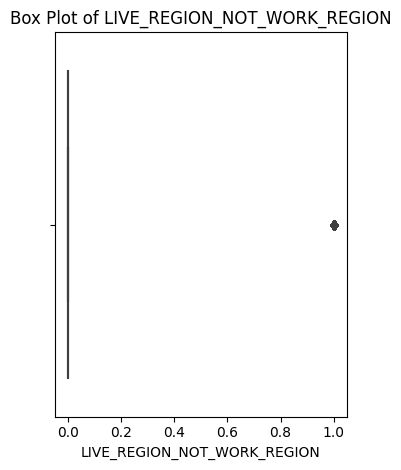

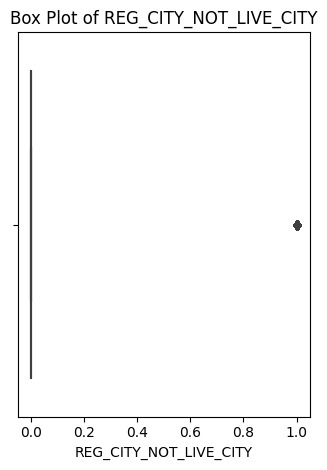

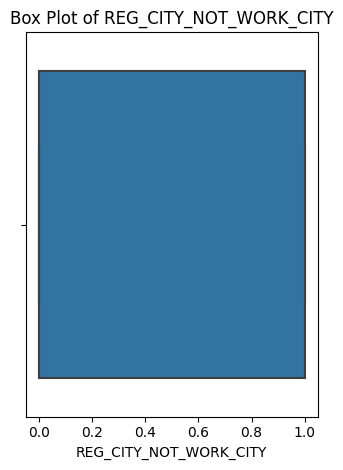

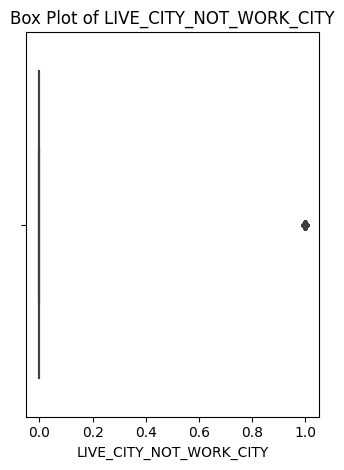

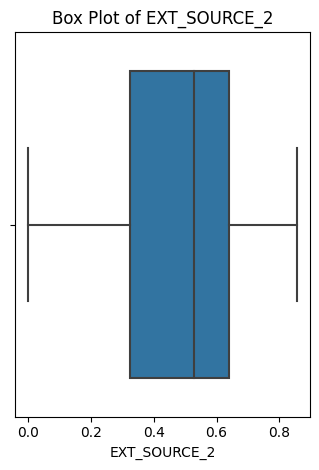

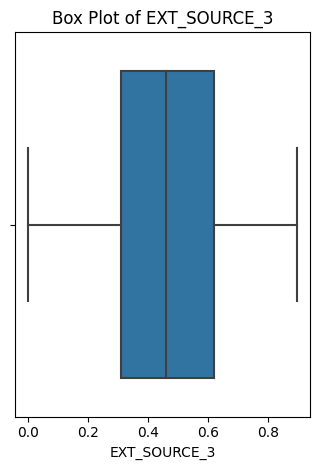

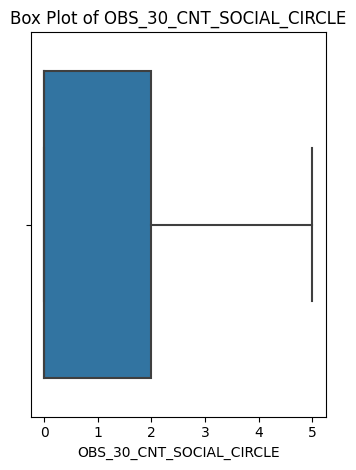

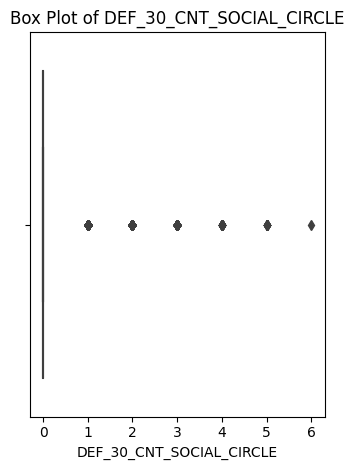

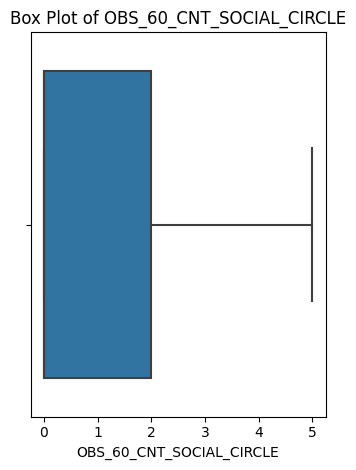

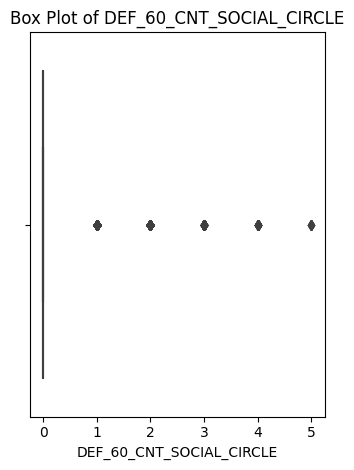

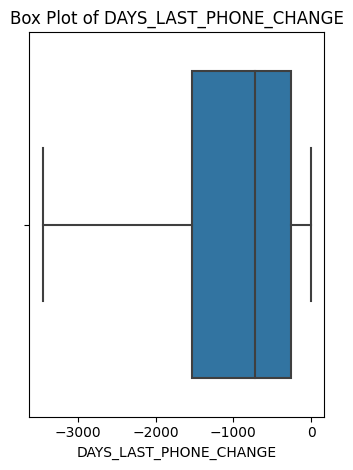

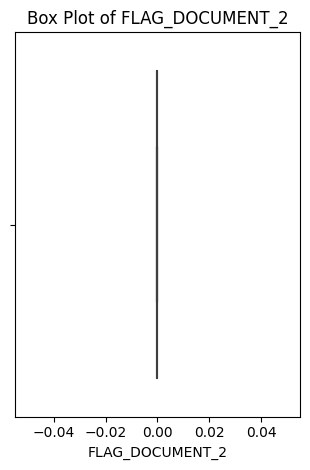

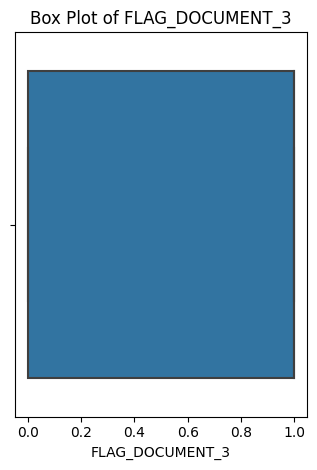

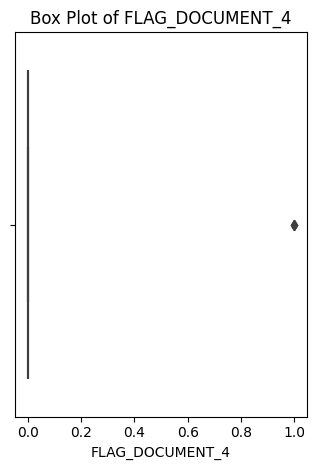

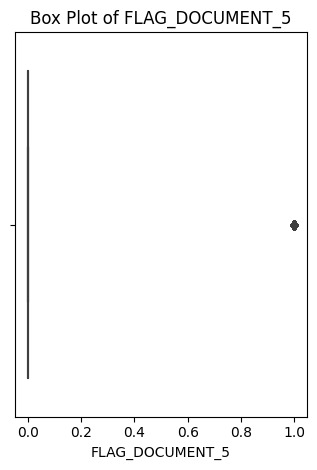

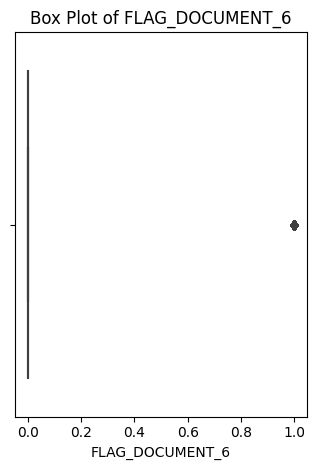

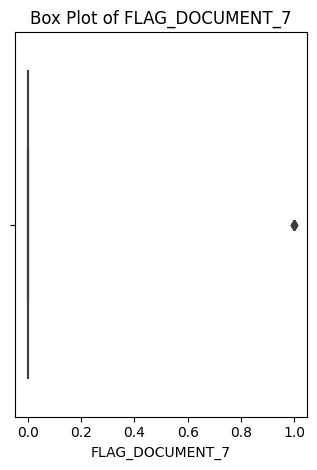

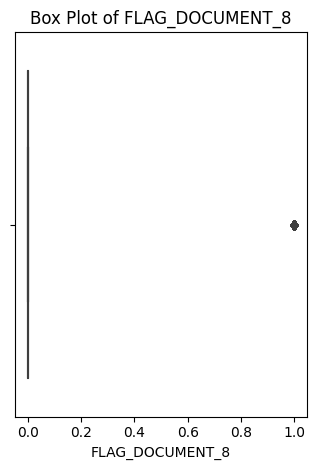

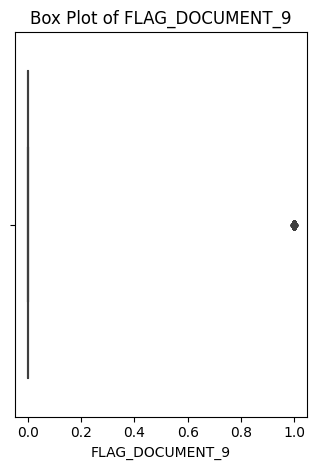

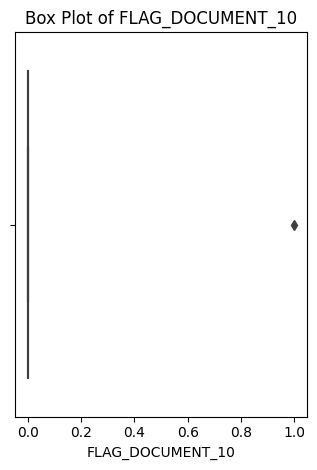

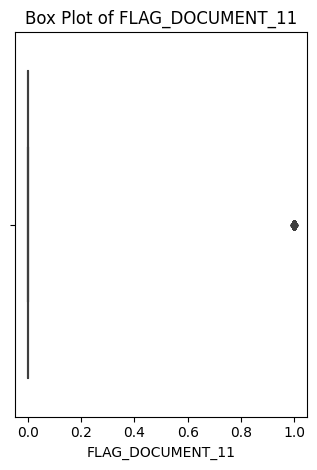

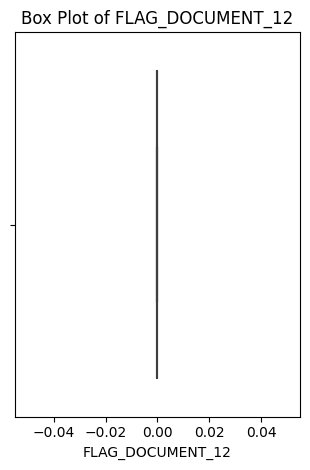

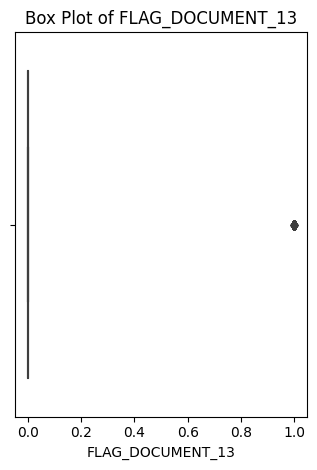

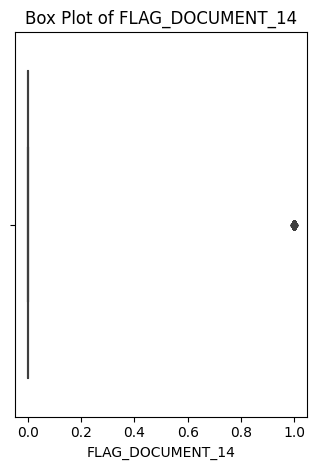

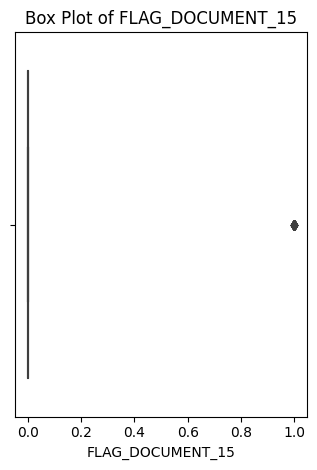

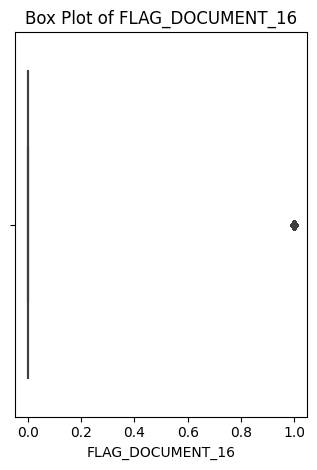

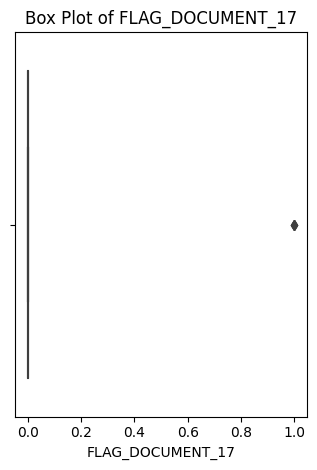

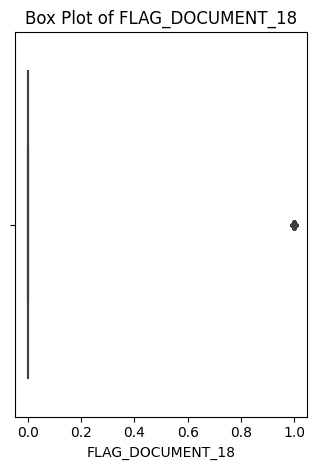

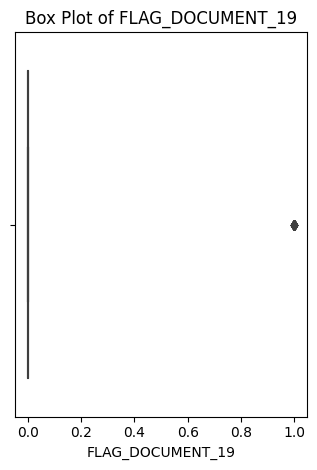

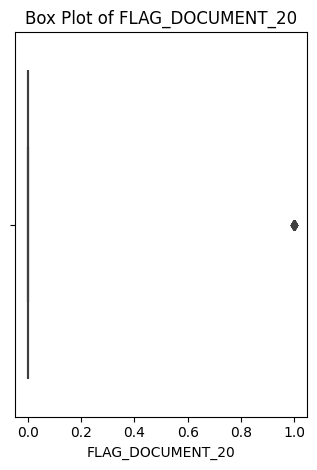

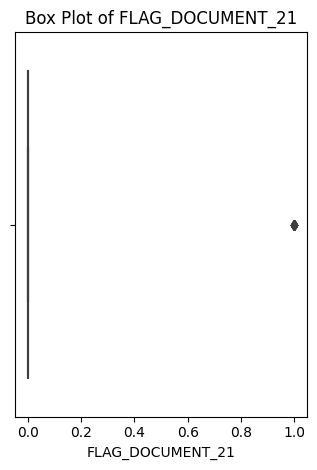

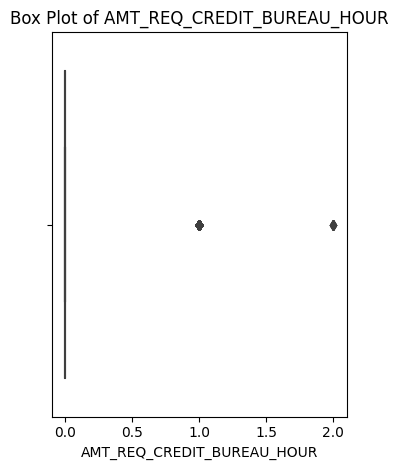

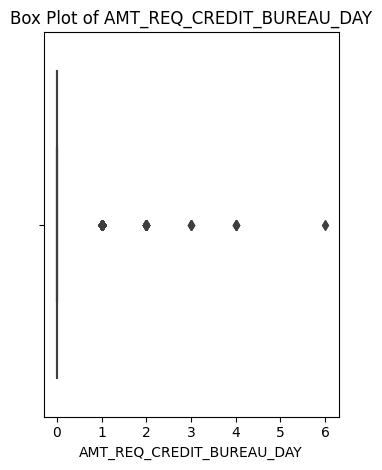

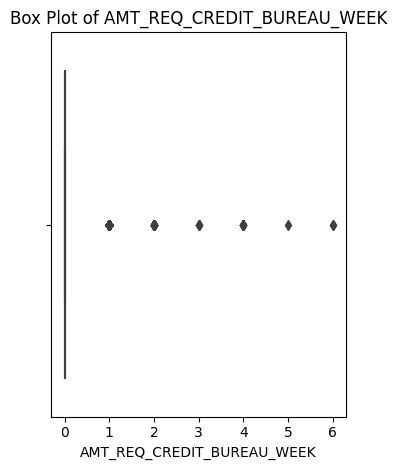

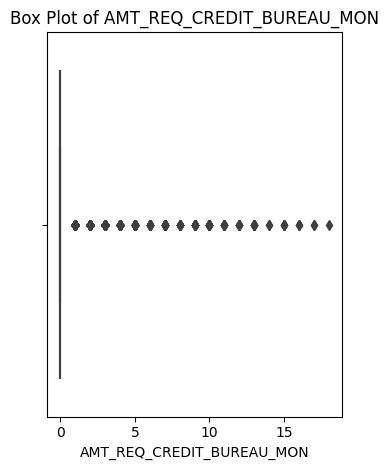

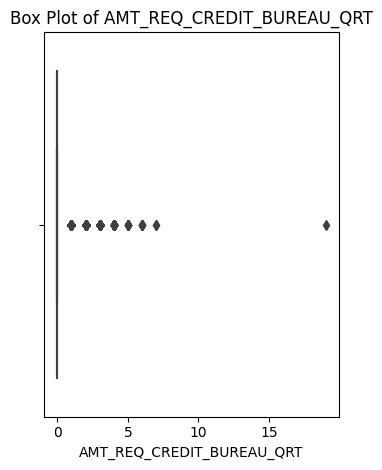

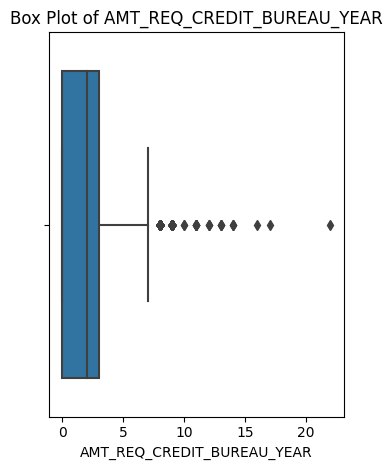

In [ ]:
#Double checkoutlier
# Define numeric and categorical attributes based on data types
numeric_attributes = loan_applicants_data_filled_cleaned.select_dtypes(include=['int64', 'float64']).columns
# Visualize numeric attributes with box plots
for attribute in numeric_attributes:

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=loan_applicants_data_filled_cleaned[attribute])
    plt.title(f'Box Plot of {attribute}')

    plt.tight_layout()
    plt.show()

In [ ]:
loan_applicants_data_filled_cleaned.shape

(36021, 72)

In [ ]:
loan_applicants_data_filled_cleaned.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100031       1         Cash loans           F            N   
2      100047       1         Cash loans           M            N   
3      100049       1         Cash loans           F            N   
4      100112       1         Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y          0.00         202500.00   406597.50     24700.50   
1               Y          0.00         112500.00   979992.00     27076.50   
2               Y          0.00         202500.00  1193580.00     35028.00   
3               N          0.00         135000.00   288873.00     16258.50   
4               Y          0.00         315000.00   953460.00     60423.75   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0        351000.00   Unaccompanied               Working   
1        702000.00   Unaccompanied               Working   
2        855000.00   Unaccompanied  Commercial associate   
3        238500.00   Unaccompanied               Working   
4        900000.00          Family  Commercial associate   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Secondary / secondary special                 Widow  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4              Incomplete higher  Single / not married       With parents   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461        -637.00           -3648.00   
1                        0.02      -18724       -2628.00           -6573.00   
2                        0.03      -17482       -1262.00           -1182.00   
3                        0.01      -13384       -3597.00             -45.00   
4                        0.03      -10199       -2015.00           -4802.00   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1            -1827           1               1                0   
2            -1029           1               1                0   
3            -4409           1               1                1   
4            -1038           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0             1.00   
1                 1           0           0             1.00   
2                 1           0           0             2.00   
3                 1           1           0             2.00   
4                 1           0           0             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     3                            2   
2                     2                            2   
3                     3                            3   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                    10.00   
1                     MONDAY                     9.00   
2                    TUESDAY                     9.00   
3                   THURSDAY                    11.00   
4                     SUNDAY                    13.00   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                  

In [ ]:
#Binarisation
# Checking unique values in object columns

loan_applicants_data_filled_cleaned.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               6
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [ ]:
#Encoding:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Define the columns you want to label encode
columns_to_label_encode = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
# Apply label encoding to each specified column
for column in columns_to_label_encode:
    loan_applicants_data_filled_cleaned[column] = label_encoder.fit_transform(loan_applicants_data_filled_cleaned[column])




In [ ]:
loan_applicants_data_filled_cleaned.shape

(36021, 72)

In [ ]:
loan_applicants_data_filled_cleaned.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100031       1                   0            0             0   
2      100047       1                   0            1             0   
3      100049       1                   0            0             0   
4      100112       1                   0            1             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1          0.00         202500.00   406597.50     24700.50   
1                1          0.00         112500.00   979992.00     27076.50   
2                1          0.00         202500.00  1193580.00     35028.00   
3                0          0.00         135000.00   288873.00     16258.50   
4                1          0.00         315000.00   953460.00     60423.75   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0        351000.00                6                 5                    4   
1        702000.00                6                 5                    4   
2        855000.00                6                 0                    4   
3        238500.00                6                 5                    4   
4        900000.00                1                 0                    2   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   3                  1                        0.02   
1                   5                  1                        0.02   
2                   1                  1                        0.03   
3                   0                  1                        0.01   
4                   3                  5                        0.03   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0       -9461        -637.00           -3648.00            -2120           1   
1      -18724       -2628.00           -6573.00            -1827           1   
2      -17482       -1262.00           -1182.00            -1029           1   
3      -13384       -3597.00             -45.00            -4409           1   
4      -10199       -2015.00           -4802.00            -1038           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           0           0   
2               1                0                 1           0           0   
3               1                1                 1           1           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0             1.00                     2                            2   
1             1.00                     3                            2   
2             2.00                     2                            2   
3             2.00                     3                            3   
4             1.00                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           6                    10.00   
1                           1                     9.00   
2                           5                     9.00   
3                           4                    11.00   
4                           3                    13.00   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                 

In [ ]:
#One-Hot Encoding
# Define the columns you want to one-hot encode
#columns_to_one_hot_encode = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

# Perform one-hot encoding
#loan_applicants_data_filled_cleaned = pd.get_dummies(loan_applicants_data_filled_cleaned, columns=columns_to_one_hot_encode)

In [ ]:
#Normalisation: Min-Max Scaling
scaler = MinMaxScaler(feature_range = (0, 1))
loan_applicants_data_filled_cleaned_scaled = scaler.fit_transform(loan_applicants_data_filled_cleaned)
loan_applicants_data_filled_cleaned_scaled = pd.DataFrame(loan_applicants_data_filled_cleaned_scaled, columns=loan_applicants_data_filled_cleaned.columns)
loan_applicants_data_filled_cleaned_scaled.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0    0.000000     1.0                 0.0          1.0           0.0   
1    0.000081     1.0                 0.0          0.0           0.0   
2    0.000126     1.0                 0.0          1.0           0.0   
3    0.000132     1.0                 0.0          0.0           0.0   
4    0.000309     1.0                 0.0          1.0           1.0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0              1.0           0.0          0.565217    0.241524     0.386728   
1              1.0           0.0          0.275362    0.624515     0.427517   
2              1.0           0.0          0.565217    0.767178     0.564023   
3              0.0           0.0          0.347826    0.162891     0.241802   
4              1.0           0.0          0.927536    0.606793     1.000000   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         0.238179         1.000000               1.0                  1.0   
1         0.511384         1.000000               1.0                  1.0   
2         0.630473         1.000000               0.0                  1.0   
3         0.150613         1.000000               1.0                  1.0   
4         0.665499         0.166667               0.0                  0.5   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                 0.6                0.2                    0.365245   
1                 1.0                0.2                    0.350013   
2                 0.2                0.2                    0.490795   
3                 0.0                0.2                    0.138415   
4                 0.6                1.0                    0.601113   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0    0.898196       0.592627           0.757398         0.667972         0.0   
1    0.369305       0.371896           0.562878         0.713883         0.0   
2    0.440219       0.523337           0.921394         0.838922         0.0   
3    0.674203       0.264468           0.997007         0.309307         0.0   
4    0.856058       0.439856           0.680654         0.837512         0.0   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0             1.0              0.0               1.0         1.0         0.0   
1             1.0              0.0               1.0         0.0         0.0   
2             1.0              0.0               1.0         0.0         0.0   
3             1.0              1.0               1.0         1.0         0.0   
4             1.0              0.0               1.0         0.0         0.0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0         0.000000                   0.5                          0.5   
1         0.000000                   1.0                          0.5   
2         0.285714                   0.5                          0.5   
3         0.285714                   1.0                          1.0   
4         0.000000                   0.5                          0.5   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                    1.000000                   0.3750   
1                    0.166667                   0.3125   
2                    0.833333                   0.3125   
3                    0.666667                   0.4375   
4                    0.500000                   0.5625   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Split the data into features (X) and the target variable (y)
X = loan_applicants_data_filled_cleaned.drop(columns=['TARGET'])
y = loan_applicants_data_filled_cleaned['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Function to print the confusion matrix
def print_confusion_matrix(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    print(f'Confusion Matrix:')
    print(f'              Predicted 0   Predicted 1')
    print(f'Actual 0:     {tn:12}   {fp:12}')
    print(f'Actual 1:     {fn:12}   {tp:12}')

#Build a model for evaluate classifier

def evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate ROC curve and AUC
    y_scores = classifier.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)

    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix,
        "ROC Curve": (fpr, tpr, auc),
        "AUC": auc
    }

    return metrics

def plot_roc_curve(fpr, tpr, auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()






Model Evaluation Metrics:
Accuracy: 0.58
Precision: 0.54
Recall: 0.54
F1-Score: 0.54
Confusion Matrix:
              Predicted 0   Predicted 1
Actual 0:             3604           2279
Actual 1:             2247           2677


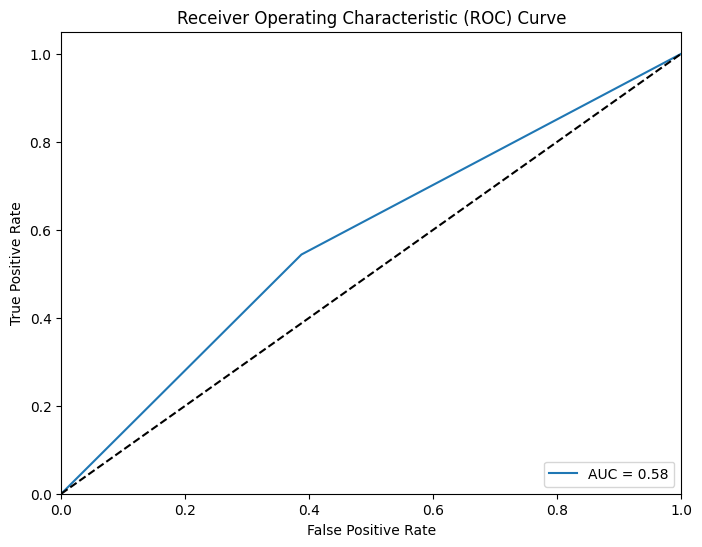

AUC: 0.58


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Evaluate the Decision Tree Classifier using the function
evaluation = evaluate_classifier(dtc, X_train, y_train, X_test, y_test)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")


In [ ]:
#Hyperparameter tuning for dtc
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
best_params = grid_search.best_params_
print(best_params)


{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}


In [ ]:
# train with best hyperarameters
best_dtc = DecisionTreeClassifier(**best_params)
best_dtc.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, splitter='random')

Model Evaluation Metrics:
Accuracy: 0.65
Precision: 0.63
Recall: 0.58
F1-Score: 0.61
Confusion Matrix:
              Predicted 0   Predicted 1
Actual 0:             4178           1705
Actual 1:             2046           2878


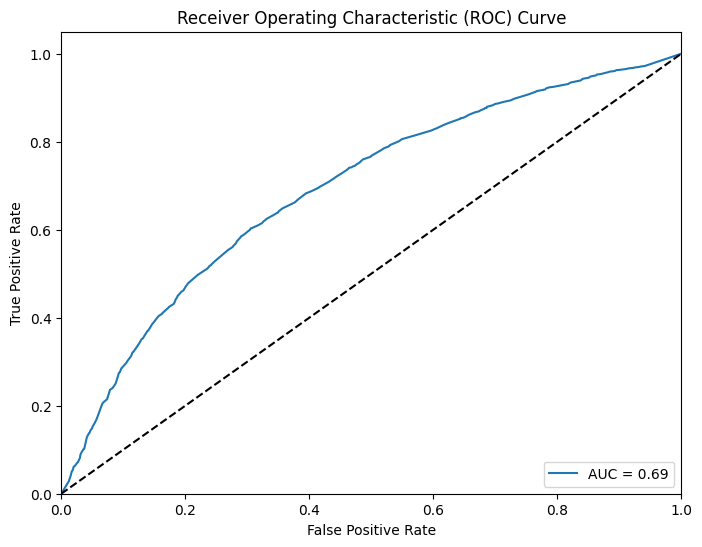

AUC: 0.69


In [ ]:
# Evaluate the best Decision Tree Classifier using the function
evaluation = evaluate_classifier(best_dtc, X_train, y_train, X_test, y_test)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")


Model Evaluation Metrics:
Accuracy: 0.54
Precision: 0.50
Recall: 0.48
F1-Score: 0.49
Confusion Matrix:
              Predicted 0   Predicted 1
Actual 0:             3420           2434
Actual 1:             2555           2398


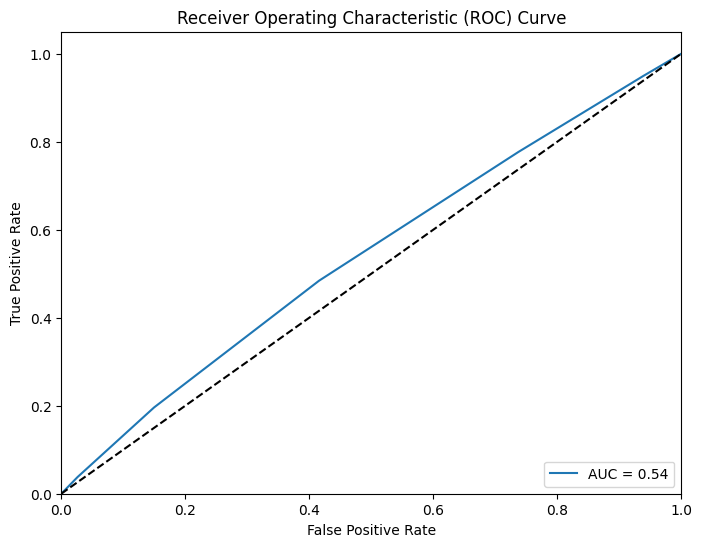

AUC: 0.54


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()


evaluation = evaluate_classifier(knn, X_train, y_train, X_test, y_test)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")


In [ ]:
#Hyperparameter tunning for KNN
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Vary the number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
#Get the best parameters
best_params = grid_search.best_params_
print(best_params)




{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [ ]:
#train with best hyperparameter
best_knn = KNeighborsClassifier(n_neighbors= 3, p = 1, weights= 'uniform')
best_knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3, p=1)

Model Evaluation Metrics:
Accuracy: 0.54
Precision: 0.50
Recall: 0.51
F1-Score: 0.50
Confusion Matrix:
              Predicted 0   Predicted 1
Actual 0:             3308           2546
Actual 1:             2447           2506


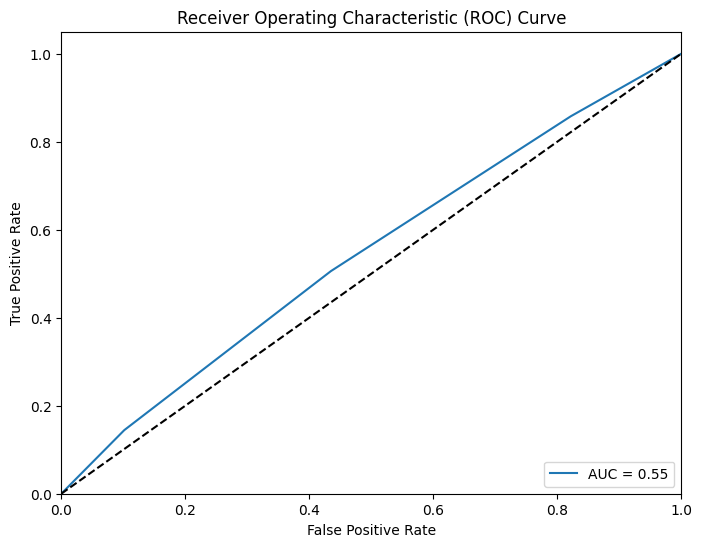

AUC: 0.55


In [ ]:
# Evaluate the best knn Classifier using the function
evaluation = evaluate_classifier(best_knn, X_train, y_train, X_test, y_test)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")

Model Evaluation Metrics:
Accuracy: 0.54
Precision: 0.50
Recall: 0.51
F1-Score: 0.51
Confusion Matrix:
              Predicted 0   Predicted 1
Actual 0:             3324           2510
Actual 1:             2444           2529


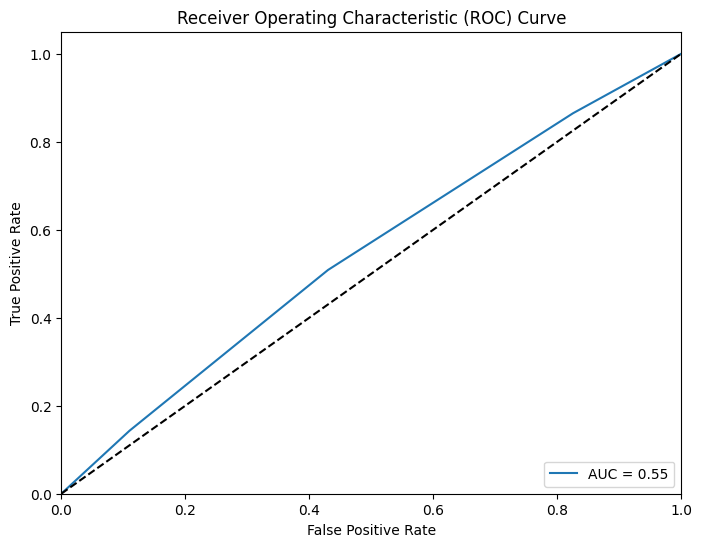

AUC: 0.55


In [ ]:
#evaluate best
evaluation = evaluate_classifier(best_knn, X_train, y_train, X_test, y_test)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")

Support Vector Machines
There are several approaches.

SVC - support vector classifier. Can be used on binary and multi-class problems. Uses the C parameter to control the regularisation. C defaults to 1, use lower values (down to minumum of 0) if you have noisy data. This causes more regularisation.
NuSVC - similar to above except it uses a parameter nu to control the number of support vectors. nu is between 0 and 1. It is the maximum proportion of margin bound errors. In other words, it controls the softness of the SVM.

In [ ]:
#SVM Support Vector Machines - SVC
from sklearn.svm import SVC
svm = SVC(kernel='linear')
evaluation = evaluate_classifier(svm, X_train, y_train, X_test, y_test)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Support Vector Machine (SVM) classifier
svm_classifier = svm.SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}

# Use HalvingGridSearchCV for hyperparameter tuning
halving_search = HalvingGridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the HalvingGridSearchCV on the training data
halving_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = halving_search.best_params_

# Create an SVM classifier with the best hyperparameters
best_svm = svm.SVC(**best_params)

# Train the best classifier on the training data
best_svm.fit(X_train, y_train)

# Evaluate the best classifier
evaluation = evaluate_classifier(best_svm, X_train, y_train, X_test, y_test)
# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")

# Print the evaluation metrics
print("Best Hyperparameters:", best_params)


   iter  n_resources  mean_fit_time  std_fit_time  mean_score_time  \
0     0          111           0.00          0.00             0.00   
1     0          111           0.00          0.00             0.00   
2     0          111           0.00          0.00             0.00   
3     0          111           0.00          0.00             0.00   
4     0          111           0.00          0.00             0.00   

   std_score_time param_C param_kernel                           params  \
0            0.00    0.10       linear   {'C': 0.1, 'kernel': 'linear'}   
1            0.00    0.10          rbf      {'C': 0.1, 'kernel': 'rbf'}   
2            0.00    0.10      sigmoid  {'C': 0.1, 'kernel': 'sigmoid'}   
3            0.00    0.10         poly     {'C': 0.1, 'kernel': 'poly'}   
4            0.00    0.50       linear   {'C': 0.5, 'kernel': 'linear'}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0               0.95               0.95        

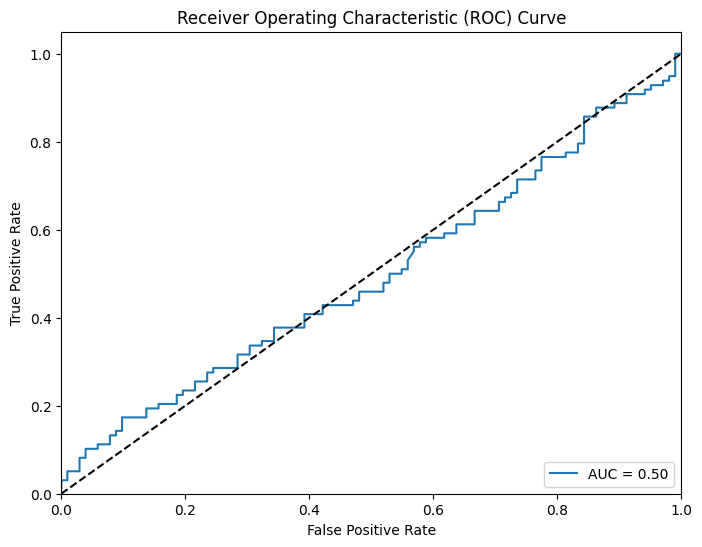

AUC: 0.50


In [ ]:
from sklearn import svm
from time import time
from pandas import DataFrame
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Function to perform halving grid search
def tune_with_halving_grid_search(x_train, y_train, params):
    svc = svm.SVC()
    halving_search = HalvingGridSearchCV(svc, params, cv=5, scoring='accuracy')

    start_time = time()
    halving_search.fit(x_train, y_train)
    duration = time() - start_time

    results = DataFrame(halving_search.cv_results_)

    return results, duration

def main():

    # Dummy data for illustration purposes
    x_train, y_train = make_classification(n_samples=1000, n_features=20, random_state=42)
    x_test, y_test = make_classification(n_samples=200, n_features=20, random_state=42)

    svc_params = {
        'C': [0.1, 0.5, 1, 2, 5, 10],
        'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],

    }

    halving_results, halving_duration = tune_with_halving_grid_search(x_train, y_train, svc_params)

    print(halving_results.head())

    score = halving_results['mean_test_score'].iloc[0]
    params = halving_results['params'].iloc[0]

    svc = svm.SVC(probability=True,**params)
    svc.fit(x_train, y_train)
    accuracy = accuracy_score(y_test, svc.predict(x_test))

    print(f'Best score for HalvingGridSearchCv is {score:.3f}, took {halving_duration:.2f} seconds')
    print(f'Params: {params}')
    print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')

    # Evaluate the best model
    evaluation = evaluate_classifier(svc, x_train, y_train, x_test, y_test)

    # Print the evaluation metrics
    print("\nModel Evaluation Metrics:")
    for metric, value in evaluation.items():
        if metric == "Confusion Matrix":
            print("Confusion Matrix:")
            print(value)
        elif metric == "ROC Curve":
            plot_roc_curve(*value)
        else:
            print(f"{metric}: {value:.2f}")

if __name__ == '__main__':
    main()



Model Evaluation Metrics:
Accuracy: 0.51
Precision: 0.47
Recall: 0.60
F1-Score: 0.53
Confusion Matrix:
              Predicted 0   Predicted 1
Actual 0:             2581           3278
Actual 1:             1989           2959


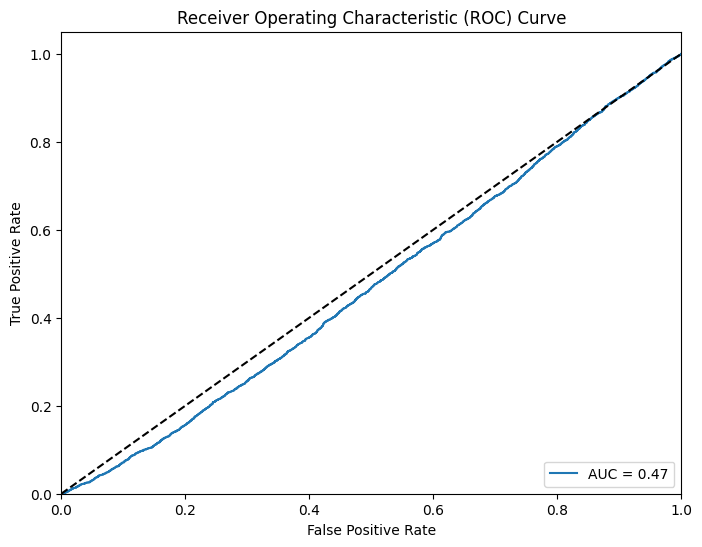

AUC: 0.47


In [ ]:
#NuSVC
from sklearn.svm import NuSVC
svm2 = NuSVC(probability=True)
evaluation = evaluate_classifier(svm2, X_train, y_train, X_test, y_test)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
672 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
672 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 252, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 331, in _dense_fit
    ) = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 19

   iter  n_resources  mean_fit_time  std_fit_time  mean_score_time  \
0     0           20           0.00          0.00             0.00   
1     0           20           0.00          0.00             0.00   
2     0           20           0.00          0.00             0.00   
3     0           20           0.00          0.00             0.00   
4     0           20           0.00          0.00             0.00   

   std_score_time param_degree param_gamma param_kernel param_nu param_tol  \
0            0.00            2       scale       linear     0.10      0.00   
1            0.00            2       scale       linear     0.10      0.01   
2            0.00            2       scale       linear     0.50      0.00   
3            0.00            2       scale       linear     0.50      0.01   
4            0.00            2       scale       linear     0.70      0.00   

                                              params  split0_test_score  \
0  {'degree': 2, 'gamma': 'scale', 

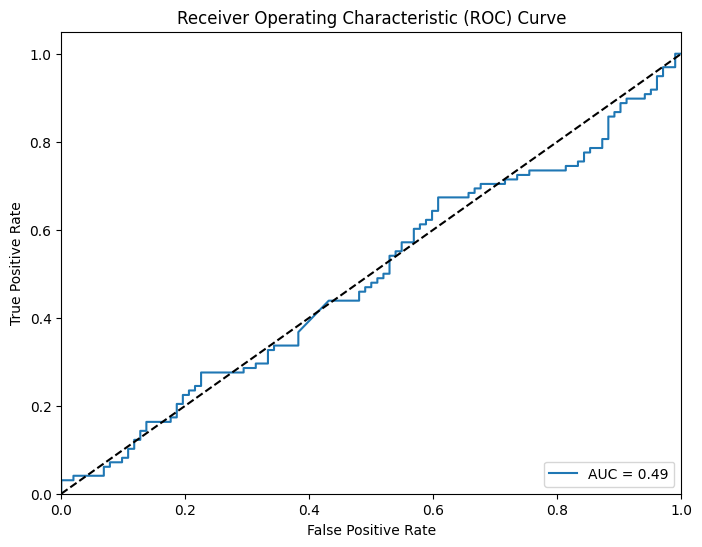

AUC: 0.49


In [ ]:
from sklearn.svm import NuSVC
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from time import time
from pandas import DataFrame

# Function to perform Halving Grid Search
def tune_with_halving_grid_search(x_train, y_train, params):
    nusvc = NuSVC()
    halving_search = HalvingGridSearchCV(nusvc, params, cv=5, scoring='accuracy')

    start_time = time()
    halving_search.fit(x_train, y_train)
    duration = time() - start_time

    results = DataFrame(halving_search.cv_results_)

    return results, duration, halving_search.best_estimator_

def main():
    # Dummy data for illustration purposes
    x_train, y_train = make_classification(n_samples=1000, n_features=20, random_state=42)
    x_test, y_test = make_classification(n_samples=200, n_features=20, random_state=42)

    nusvc_params = {
        'nu': [0.1, 0.5, 0.7, 0.9],
        'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto', 0.1, 1],
        'tol': [1e-3, 1e-2]
    }

    halving_results, halving_duration, best_nusvc = tune_with_halving_grid_search(x_train, y_train, nusvc_params)

    print(halving_results.head())

    score = halving_results['mean_test_score'].iloc[0]
    params = halving_results['params'].iloc[0]

    nusvc = NuSVC(probability=True, **params)
    nusvc.fit(x_train, y_train)
    accuracy = accuracy_score(y_test, nusvc.predict(x_test))

    print(f'Best score for HalvingGridSearchCv with NuSVC is {score:.3f}, took {halving_duration:.2f} seconds')
    print(f'Params: {params}')
    print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')

    # Evaluate the best model
    evaluation = evaluate_classifier(nusvc, x_train, y_train, x_test, y_test)

    # Print the evaluation metrics
    print("\nModel Evaluation Metrics:")
    for metric, value in evaluation.items():
        if metric == "Confusion Matrix":
            print("Confusion Matrix:")
            print(value)
        elif metric == "ROC Curve":
            plot_roc_curve(*value)
        else:
            print(f"{metric}: {value:.2f}")

if __name__ == '__main__':
    main()



Model Evaluation Metrics:
Accuracy: 0.68
Precision: 0.67
Recall: 0.61
F1-Score: 0.63
Confusion Matrix:
              Predicted 0   Predicted 1
Actual 0:             4305           1518
Actual 1:             1966           3018


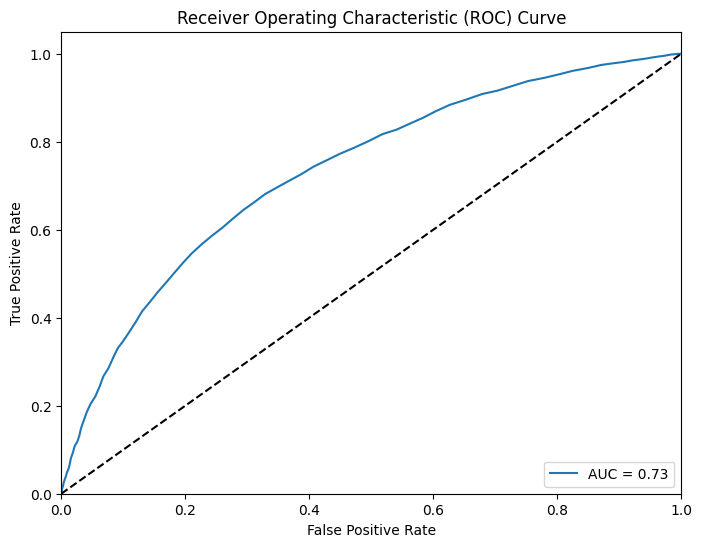

AUC: 0.73


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
evaluation = evaluate_classifier(rfc, X_train, y_train, X_test, y_test)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'max_features': ['auto', 'sqrt', 'log2'],  # The number of features to consider when looking for the best split
}
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
best_params = grid_search.best_params_
print(best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

{'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 50}


Model Evaluation Metrics:
Accuracy: 0.68
Precision: 0.68
Recall: 0.58
F1-Score: 0.62
Confusion Matrix:
              Predicted 0   Predicted 1
Actual 0:             4433           1351
Actual 1:             2131           2892


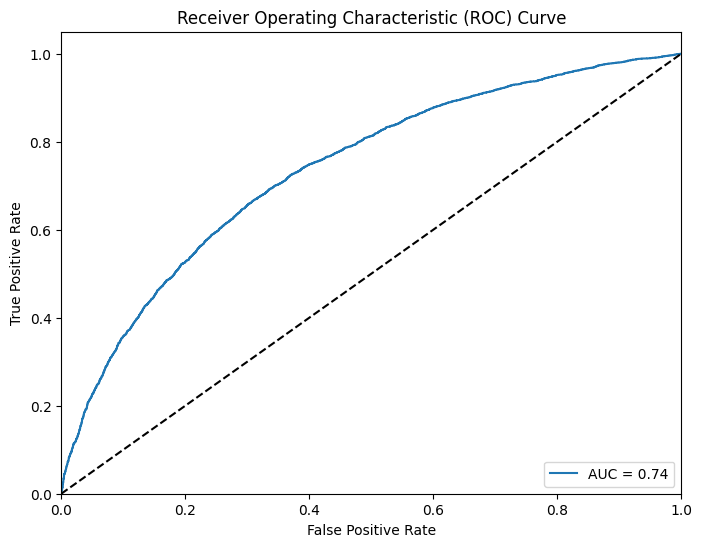

AUC: 0.74


In [ ]:
best_rfc = RandomForestClassifier(**best_params)
best_rfc.fit(X_train, y_train)
evaluation = evaluate_classifier(best_rfc, X_train, y_train, X_test, y_test)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation Metrics:
Accuracy: 0.59
Precision: 0.58
Recall: 0.38
F1-Score: 0.46
Confusion Matrix:
              Predicted 0   Predicted 1
Actual 0:             4538           1321
Actual 1:             3090           1858


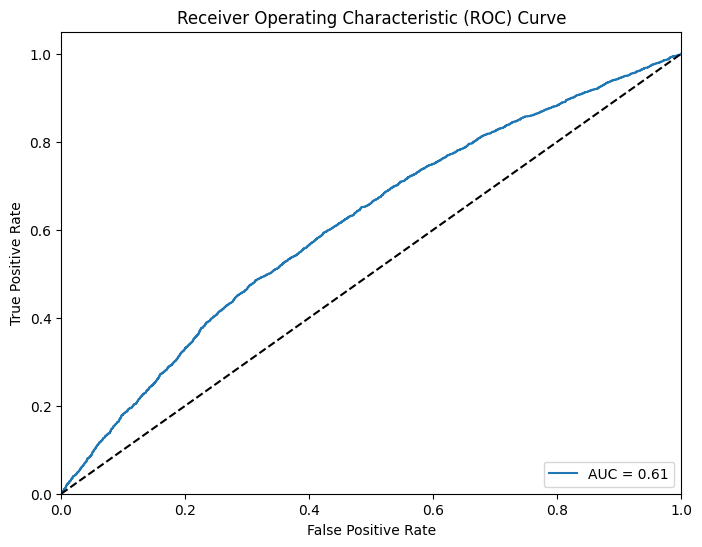

AUC: 0.61


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
evaluation = evaluate_classifier(lrc, X_train, y_train, X_test, y_test)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Model Evaluation Metrics:
Accuracy: 0.69
Precision: 0.69
Recall: 0.61
F1-Score: 0.64
Confusion Matrix:
              Predicted 0   Predicted 1
Actual 0:             2882            945
Actual 1:             1323           2055


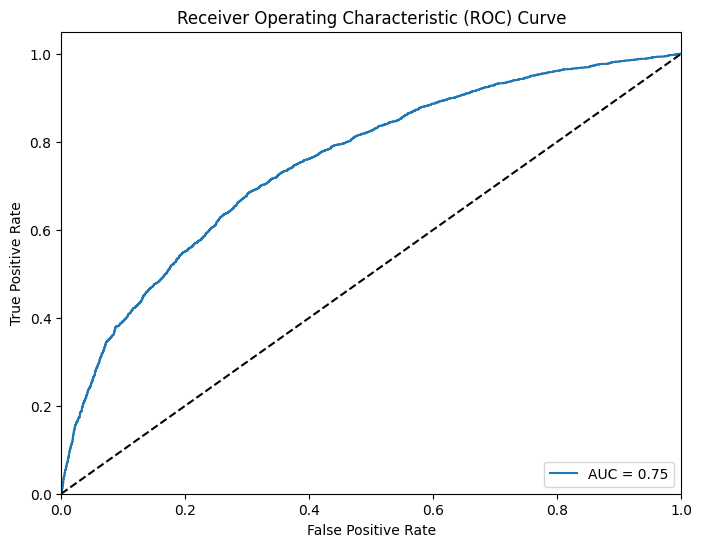

AUC: 0.75
Best Hyperparameters: {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import HalvingGridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
logreg = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Use HalvingGridSearchCV for hyperparameter tuning
halving_search = HalvingGridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the HalvingGridSearchCV on the training data
halving_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = halving_search.best_params_

# Create a Logistic Regression classifier with the best hyperparameters
best_logreg = LogisticRegression(**best_params)

# Train the best classifier on the training data
best_logreg.fit(X_train, y_train)

# Evaluate the best classifier
evaluation = evaluate_classifier(best_logreg, X_train, y_train, X_test, y_test)
# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")

# Print the evaluation metrics
print("Best Hyperparameters:", best_params)


In [ ]:
#MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(2,3), random_state=0, verbose=True, max_iter=5000)
mlp.fit(x_train, y_train)

#evaluate
evaluation = evaluate_classifier(mlp, X_train, y_train, X_test, y_test)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")

NotFittedError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import HalvingGridSearchCV, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from time import time
from pandas import DataFrame

# Function to perform Halving Grid Search
def tune_with_halving_grid_search(x_train, y_train, params):
    mlp = MLPClassifier()
    halving_search = HalvingGridSearchCV(mlp, params, cv=5, scoring='accuracy')

    start_time = time()
    halving_search.fit(x_train, y_train)
    duration = time() - start_time

    results = DataFrame(halving_search.cv_results_)

    return results, duration, halving_search.best_estimator_

def main():
    # Assuming you have x_train, x_test, y_train, y_test from your dataset
    # Replace this with your actual dataset loading and splitting logic

    # Dummy data for illustration purposes
    x_train, y_train = make_classification(n_samples=1000, n_features=20, random_state=42)
    x_test, y_test = make_classification(n_samples=200, n_features=20, random_state=42)

    mlp_params = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
        'tol': [1e-3, 1e-4, 1e-5]
    }

    halving_results, halving_duration, best_mlp = tune_with_halving_grid_search(x_train, y_train, mlp_params)

    print(halving_results.head())

    score = halving_results['mean_test_score'].iloc[0]
    params = halving_results['params'].iloc[0]

    mlp = MLPClassifier(**params)
    mlp.fit(x_train, y_train)
    accuracy = accuracy_score(y_test, mlp.predict(x_test))

    print(f'Best score for HalvingGridSearchCv with MLP is {score:.3f}, took {halving_duration:.2f} seconds')
    print(f'Params: {params}')
    print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')

if __name__ == '__main__':
    main()


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-pa

   iter  n_resources  mean_fit_time  std_fit_time  mean_score_time  \
0     0           20           0.26          0.03             0.00   
1     0           20           0.14          0.02             0.00   
2     0           20           0.13          0.00             0.00   
3     0           20           0.07          0.02             0.00   
4     0           20           0.08          0.00             0.00   

   std_score_time param_activation param_alpha param_hidden_layer_sizes  \
0            0.00             relu        0.00                    (50,)   
1            0.00             relu        0.00                    (50,)   
2            0.00             relu        0.00                    (50,)   
3            0.00             relu        0.00                    (50,)   
4            0.00             relu        0.00                    (50,)   

  param_learning_rate param_solver param_tol  \
0            constant          sgd      0.00   
1            constant          s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Evaluation Metrics:
Accuracy: 0.53
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
Confusion Matrix:
              Predicted 0   Predicted 1
Actual 0:             3827              0
Actual 1:             3378              0


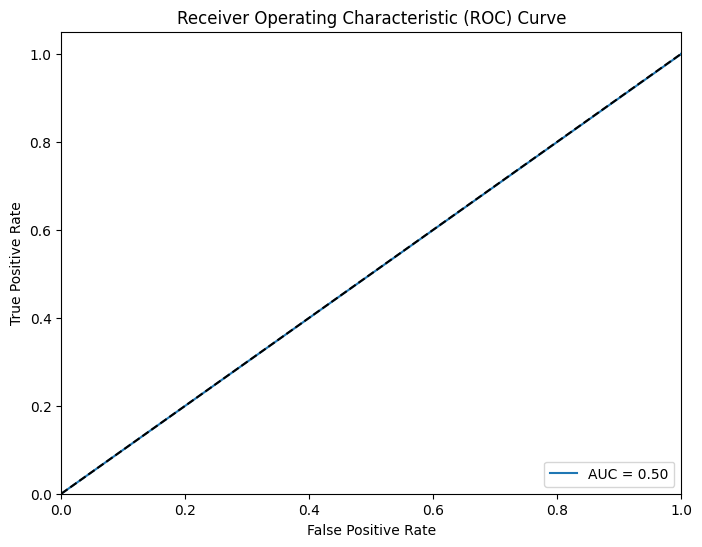

AUC: 0.50


In [ ]:
best_params = {
    'activation': 'relu',
    'alpha': 0.0001,
    'hidden_layer_sizes': (50,),
    'learning_rate': 'constant',
    'solver': 'sgd',
    'tol': 0.001
}

# Create the best MLP classifier with the best hyperparameters
best_mlp = MLPClassifier(**best_params)


#evaluate
evaluation = evaluate_classifier(best_mlp, X_train, y_train, X_test, y_test)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")

Model Evaluation Metrics:
Accuracy: 0.69
Precision: 0.67
Recall: 0.62
F1-Score: 0.64
Confusion Matrix:
              Predicted 0   Predicted 1
Actual 0:             4368           1486
Actual 1:             1889           3064


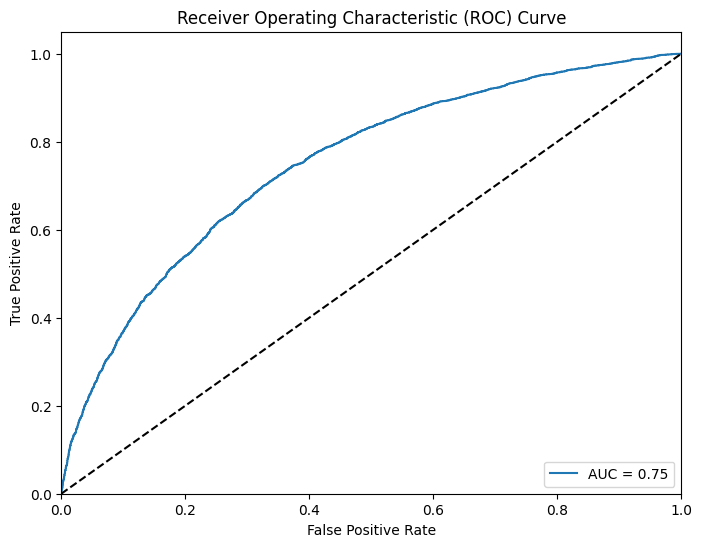

AUC: 0.75


In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
evaluation = evaluate_classifier(gbc, X_train, y_train, X_test, y_test)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import HalvingGridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Use HalvingGridSearchCV for hyperparameter tuning
halving_search = HalvingGridSearchCV(gbc, param_grid, cv=5, scoring='accuracy')

# Fit the HalvingGridSearchCV on the training data
halving_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = halving_search.best_params_

# Create a Gradient Boosting Classifier with the best hyperparameters
best_gbc = GradientBoostingClassifier(**best_params)

# Train the best classifier on the training data
best_gbc.fit(X_train, y_train)

# Evaluate the best classifier
y_pred = best_gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Accuracy: 0.6900763358778625
Confusion Matrix:
 [[2901  926]
 [1307 2071]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.72      3827
           1       0.69      0.61      0.65      3378

    accuracy                           0.69      7205
   macro avg       0.69      0.69      0.69      7205
weighted avg       0.69      0.69      0.69      7205



Model Evaluation Metrics:
Accuracy: 0.69
Precision: 0.69
Recall: 0.61
F1-Score: 0.65
Confusion Matrix:
              Predicted 0   Predicted 1
Actual 0:             2899            928
Actual 1:             1327           2051


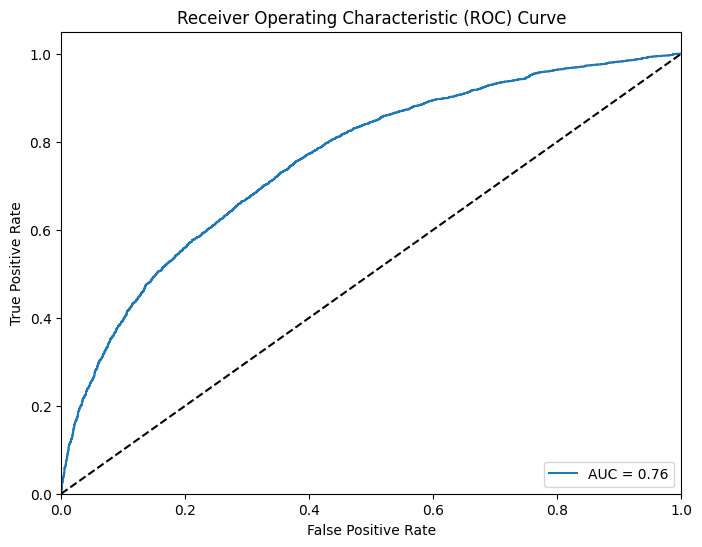

AUC: 0.76


In [ ]:
evaluation = evaluate_classifier(best_gbc, X_train, y_train, X_test, y_test)
# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")

Model Evaluation Metrics:
Accuracy: 0.58
Precision: 0.54
Recall: 0.63
F1-Score: 0.58
Confusion Matrix:
              Predicted 0   Predicted 1
Actual 0:             3166           2693
Actual 1:             1829           3119


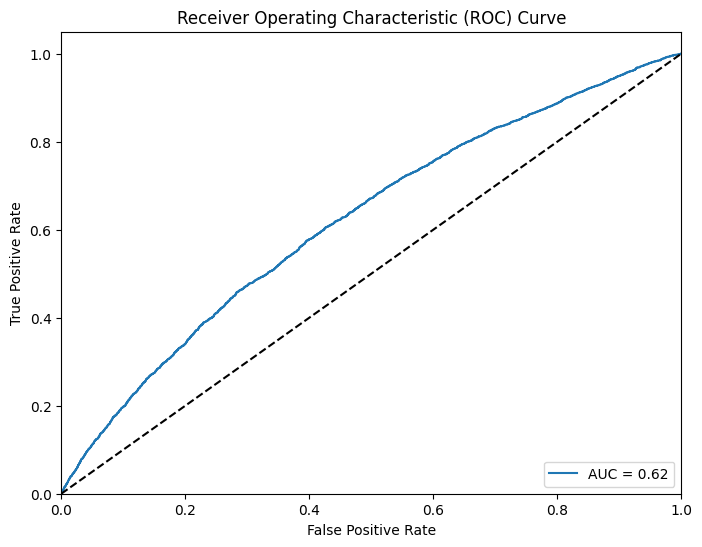

AUC: 0.62


In [ ]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
evaluation = evaluate_classifier(gnb, X_train, y_train, X_test, y_test)
# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")

Model Evaluation Metrics:
Accuracy: 0.59
Precision: 0.56
Recall: 0.62
F1-Score: 0.59
Confusion Matrix:
              Predicted 0   Predicted 1
Actual 0:             2147           1680
Actual 1:             1275           2103


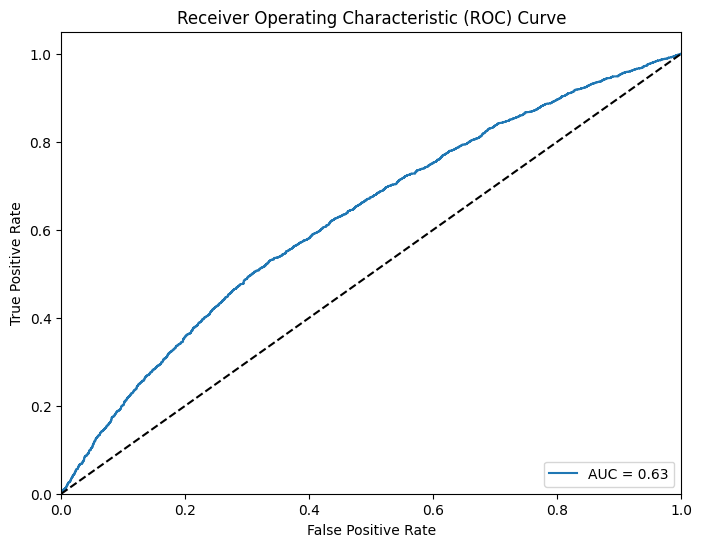

AUC: 0.63
Best Hyperparameters: {'var_smoothing': 1e-08}


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import HalvingGridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define the hyperparameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Use HalvingGridSearchCV for hyperparameter tuning
halving_search = HalvingGridSearchCV(gnb, param_grid, cv=5, scoring='accuracy')

# Fit the HalvingGridSearchCV on the training data
halving_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = halving_search.best_params_

# Create a Gaussian Naive Bayes classifier with the best hyperparameters
best_gnb = GaussianNB(**best_params)

# Train the best classifier on the training data
best_gnb.fit(X_train, y_train)

# Evaluate the best classifier
evaluation = evaluate_classifier(best_gnb, X_train, y_train, X_test, y_test)
# Print the evaluation metrics
print("Model Evaluation Metrics:")
for metric, value in evaluation.items():
    if metric == "Confusion Matrix":
        print_confusion_matrix(value)
    elif metric == "ROC Curve":
        plot_roc_curve(*value)
    else:
        print(f"{metric}: {value:.2f}")

# Print the evaluation metrics
print("Best Hyperparameters:", best_params)



In [ ]:
# Deployment
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the unknown dataset

unknown_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/loan_data_unknown.csv")
#Missing data -
#check the number of missing value in each column
missing_values_count = unknown_data.isnull().sum()
print(missing_values_count)





SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   6
NAME_TYPE_SUITE                  19
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT        

In [ ]:
# Impute the missing value

# Define the columns and their respective imputation methods
impute_methods = {
    'AMT_GOODS_PRICE': 'median',
    'EXT_SOURCE_2': 'median',
    'OBS_30_CNT_SOCIAL_CIRCLE': 'mode',
    'DEF_30_CNT_SOCIAL_CIRCLE': 'mode',
    'OBS_60_CNT_SOCIAL_CIRCLE': 'mode',
    'DEF_60_CNT_SOCIAL_CIRCLE': 'mode',
    'NAME_TYPE_SUITE': 'mode',
    'AMT_REQ_CREDIT_BUREAU_QRT': 'mode',
    'AMT_REQ_CREDIT_BUREAU_HOUR': 'mode',
    'AMT_REQ_CREDIT_BUREAU_DAY': 'mode',
    'AMT_REQ_CREDIT_BUREAU_WEEK': 'mode',
    'AMT_REQ_CREDIT_BUREAU_MON': 'mode',
    'AMT_REQ_CREDIT_BUREAU_YEAR': 'remove',
    'EXT_SOURCE_3': 'mean',
    'AMT_ANNUITY': 'median',
    'CNT_FAM_MEMBERS': 'median',
}

# Create a copy of the original DataFrame
unknown_data_filled = unknown_data.copy()

# Apply imputation methods
for column, method in impute_methods.items():
    if method == 'median':
        median_value = unknown_data_filled[column].median()
        unknown_data_filled[column].fillna(median_value, inplace=True)
    elif method == 'mode':
        mode_value = unknown_data_filled[column].mode().values[0]
        unknown_data_filled[column].fillna(mode_value, inplace=True)
    elif method == 'mean':
        mean_value = unknown_data_filled[column].mean()
        unknown_data_filled[column].fillna(mean_value, inplace=True)
    elif method == 'remove':
        unknown_data_filled.dropna(subset=[column], inplace=True)

In [ ]:
# Double check no missing values in the entire DataFrame
print('Is there any NaN: ', unknown_data_filled.isna().any().any())

Is there any NaN:  False


In [ ]:
#Handle outliers
unknown_data_filled_cleaned = unknown_data_filled.copy()

# Columns to handle outliers
columns_to_handle_outliers = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED','DAYS_REGISTRATION','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',]

# Loop through numerical columns and apply the IQR method
for column in columns_to_handle_outliers:
    # Calculate the IQR (Interquartile Range)
    Q1 = unknown_data_filled_cleaned[column].quantile(0.25)
    Q3 = unknown_data_filled_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the lower or upper bound
    unknown_data_filled_cleaned[column] = unknown_data_filled_cleaned[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )

In [ ]:
#Binarisation
# Checking unique values in object columns

unknown_data_filled_cleaned.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               4
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             55
dtype: int64

In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

columns_to_label_encode = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
# Apply label encoding to each specified column
for column in columns_to_label_encode:
    unknown_data_filled_cleaned[column] = label_encoder.fit_transform(unknown_data_filled_cleaned[column])




In [ ]:
#Normalisation: Min-Max Scaling
scaler = MinMaxScaler(feature_range = (0, 1))
unknown_data_filled_cleaned_scaled = scaler.fit_transform(unknown_data_filled_cleaned)
unknown_data_filled_cleaned_scaled = pd.DataFrame(unknown_data_filled_cleaned_scaled, columns=unknown_data_filled_cleaned.columns)
unknown_data_filled_cleaned_scaled.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0    0.505486                 0.0          1.0           1.0              1.0   
1    0.516519                 0.0          1.0           1.0              0.0   
2    0.318258                 0.0          0.0           0.0              0.0   
3    0.928833                 0.0          1.0           0.0              1.0   
4    0.680711                 0.0          1.0           1.0              0.0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.8          0.343066    0.363712     0.490612         0.318584   
1           0.4          1.000000    0.269018     0.328318         0.318584   
2           0.0          0.635036    0.316365     0.567014         0.318584   
3           0.0          0.343066    0.777163     0.571718         0.920354   
4           0.4          0.562044    0.206271     0.216067         0.176991   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0         1.000000               1.0                  1.0                0.25   
1         1.000000               1.0                  1.0                0.25   
2         1.000000               0.0                  1.0                0.00   
3         0.166667               1.0                  1.0                0.25   
4         1.000000               1.0                  1.0                0.00   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                0.2                    0.604749    0.468231       0.584793   
1                0.2                    0.694557    0.888266       0.592880   
2                0.2                    0.629540    0.474642       0.000000   
3                0.2                    0.280612    0.540985       0.155548   
4                0.8                    0.391126    0.438237       0.518980   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0           0.651622         0.914341         0.0             1.0   
1           0.773116         0.658501         0.0             1.0   
2           0.301214         0.929916         0.0             1.0   
3           0.970478         0.994809         0.0             1.0   
4           0.994043         0.849448         0.0             1.0   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0              0.0               1.0         0.0         0.0         0.857143   
1              0.0               1.0         0.0         0.0         0.571429   
2              0.0               1.0         1.0         0.0         0.285714   
3              0.0               1.0         1.0         0.0         0.285714   
4              0.0               1.0         0.0         0.0         0.571429   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                   0.5                          0.5   
1                   0.5                          0.5   
2                   0.0                          0.0   
3                   0.5                          0.5   
4                   1.0                          0.5   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                    0.333333                   0.2500   
1                    0.166667                   0.5625   
2                    0.166667                   0.3750   
3                    0.833333                   0.6875   
4                    1.000000                   0.3125   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                          0.0                     0.0   
1       

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Assuming 'TARGET' and 'SK_ID_CURR' are columns in your dataset
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the best Gradient Boosting classifier
best_gbc = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, subsample=0.9)

# Train the classifier on the full training data
best_gbc.fit(X_train, y_train)

# Make predictions on the unknown dataset
unknown_predictions = best_gbc.predict(unknown_data_filled_cleaned_scaled)

# Assuming 'SK_ID_CURR' is a column in your unknown dataset
unknown_data['TARGET'] = unknown_predictions

# Visualize or save the predictions as needed
# For example, create a new DataFrame with 'SK_ID_CURR' and the predicted target
predictions_df = unknown_data[['SK_ID_CURR', 'TARGET']]

# Save the predictions to a CSV file
predictions_df.to_csv("predictions.csv", index=False)


ValueError: ignored